# Predict future sales 

dataset that is taken from kaggel

### Task

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month.

**File descriptions**
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

**Data fields**
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=3, suppress=True)

In [3]:
df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

# Display datasets

In [4]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00          1.00
1  03.01.2013               0       25     2552      899.00          1.00
2  05.01.2013               0       25     2552      899.00         -1.00
3  06.01.2013               0       25     2554    1,709.05          1.00
4  15.01.2013               0       25     2555    1,099.00          1.00

In [5]:
df[df.item_cnt_day > 1].head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
9   03.01.2013               0       25     2573      299.00          3.00
10  03.01.2013               0       25     2574      399.00          2.00
13  08.01.2013               0       25     2574      399.00          2.00
15  11.01.2013               0       25     2574      399.00          2.00
47  10.01.2013               0       25     2746      299.00          2.00

In [6]:
test_df.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [7]:
sample_submission.head()

ID  item_cnt_month
0   0            0.50
1   1            0.50
2   2            0.50
3   3            0.50
4   4            0.50

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

In [8]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [9]:
items = items.drop('item_name', axis=1)
items.head()

item_id  item_category_id
0        0                40
1        1                76
2        2                40
3        3                40
4        4                40

In [10]:
item_categories.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [11]:
item_categories.shape

(84, 2)

In [12]:
item_categories[item_categories.item_category_id == 40]

item_category_name  item_category_id
40         Кино - DVD                40

In [13]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

# Joining dataframes

I need to join the items to the main dataframe

In [14]:
df = df.join(items.set_index('item_id'), on='item_id')

In [15]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   
1  03.01.2013               0       25     2552      899.00          1.00   
2  05.01.2013               0       25     2552      899.00         -1.00   
3  06.01.2013               0       25     2554    1,709.05          1.00   
4  15.01.2013               0       25     2555    1,099.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

# Analyze main dataframe

In [16]:
df.shape

(2935849, 7)

In [17]:
df.describe()

date_block_num      shop_id      item_id   item_price  item_cnt_day  \
count    2,935,849.00 2,935,849.00 2,935,849.00 2,935,849.00  2,935,849.00   
mean            14.57        33.00    10,197.23       890.85          1.24   
std              9.42        16.23     6,324.30     1,729.80          2.62   
min              0.00         0.00         0.00        -1.00        -22.00   
25%              7.00        22.00     4,476.00       249.00          1.00   
50%             14.00        31.00     9,343.00       399.00          1.00   
75%             23.00        47.00    15,684.00       999.00          1.00   
max             33.00        59.00    22,169.00   307,980.00      2,169.00   

       item_category_id  
count      2,935,849.00  
mean              40.00  
std               17.10  
min                0.00  
25%               28.00  
50%               40.00  
75%               55.00  
max               83.00

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 156.8+ MB


# Looking for missing values

In [19]:
df.isna().value_counts()

date   date_block_num  shop_id  item_id  item_price  item_cnt_day  item_category_id
False  False           False    False    False       False         False               2935849
dtype: int64

# Analyzing data distributions

In [20]:
date_block_value_counts = df.date_block_num.value_counts()

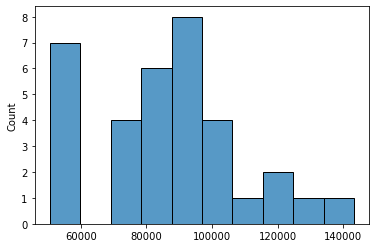

In [21]:
sns.histplot(date_block_value_counts.values, bins=10);

In [22]:
date_value_counts = df.date.value_counts()
date_value_counts.head()

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
Name: date, dtype: int64

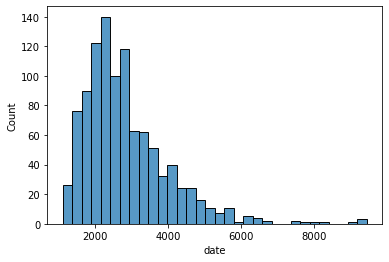

In [23]:
sns.histplot(date_value_counts);

In [24]:
target = df.item_cnt_day
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [25]:
target.unique()

array([   1.,   -1.,    3.,    2.,    4.,    5.,   13.,    7.,    6.,
          8.,   10.,   11.,   30.,   22.,   14.,   15.,    9.,   12.,
         17.,   19.,   20.,   -5.,   -6.,   -3.,   -2.,   16.,   64.,
         18.,   29.,   26.,   39.,   21.,   27.,   53.,   25.,   23.,
         24.,   40.,   28.,   31.,   36.,   -4.,   32.,   35.,   41.,
         88.,   44.,   52.,   56.,   38.,   34.,   57.,   69.,   37.,
         47.,   50.,   48.,   33.,   61.,   80.,   42.,   82.,  200.,
        100.,   76.,   77.,  107.,   46.,   49.,   70.,   55.,   60.,
         45.,   71.,   65.,  150.,   85.,   89.,   43.,   58.,  217.,
        104.,   84.,  168.,   92.,  156.,   68.,   62.,  264.,  110.,
         83.,  133.,   51.,  148.,   54.,   67.,  106.,  109.,  102.,
         90.,  288.,  171.,  131.,   87.,   78.,  151.,   59.,  113.,
        118.,  127.,   97.,  135.,  -22.,  103.,  111.,   96.,  242.,
        105.,   72.,  126.,   73.,  101.,   91.,   63.,  194.,  255.,
         98.,   81.,

In [26]:
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [27]:
target_value_counts = target.value_counts()

In [28]:
target_value_counts

1.00      2629372
2.00       194201
3.00        47350
4.00        19685
5.00        10474
           ...   
179.00          1
187.00          1
194.00          1
195.00          1
508.00          1
Name: item_cnt_day, Length: 198, dtype: int64

In [29]:
df.head(1)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   

   item_category_id  
0                37

In [30]:
target.min()

-22.0

In [31]:
df.item_price.min()

-1.0

In [32]:
df['item_price'] = df['item_price'] + np.absolute(df.item_price.min()) + 1

In [33]:
df.item_price.min()

1.0

In [34]:
target = target + np.absolute(target) + 1

In [35]:
target.min()

1.0

In [36]:
log_target = np.log(target)
log_item_price = np.log(df.item_price)

In [37]:
df.head(1)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   

   item_category_id  
0                37

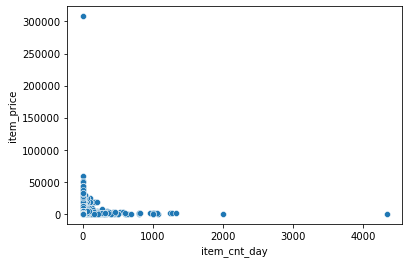

In [38]:
sns.scatterplot(x=target, y=df.item_price);

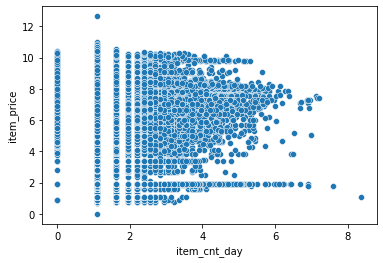

In [39]:
sns.scatterplot(x=log_target, y=log_item_price);

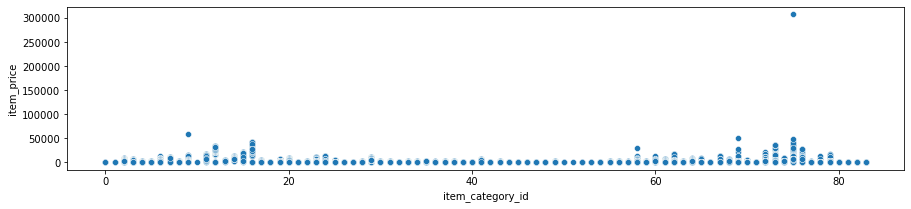

In [40]:
plt.figure(figsize=(15, 3))
sns.scatterplot(x=df.item_category_id, y=df.item_price);

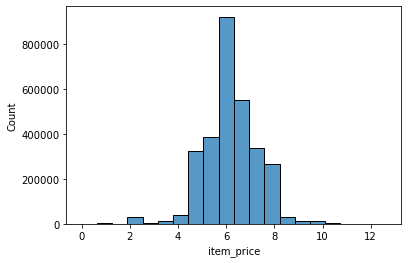

In [41]:
sns.histplot(np.log(df.item_price), bins=20);

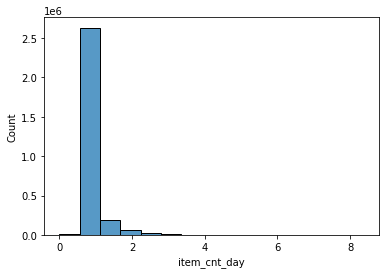

In [42]:
sns.histplot(log_target, bins=15);

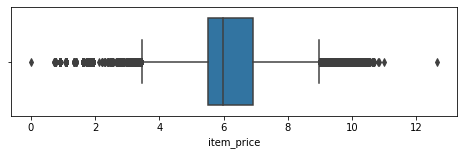

In [56]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=np.log(df.item_price));

# Analyzing time series

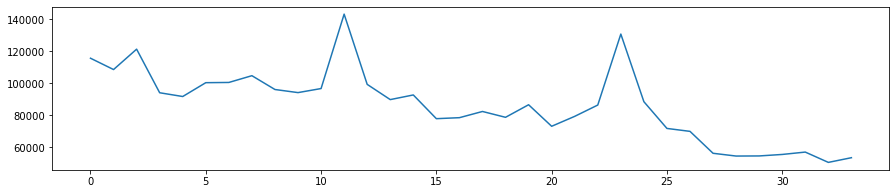

In [43]:
plt.figure(figsize=(15, 3))
sns.lineplot(x=date_block_value_counts.index, y=date_block_value_counts.values);

The time series above shows decreasing trend and seasonality

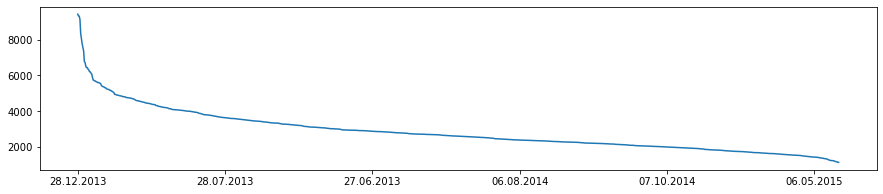

In [44]:
plt.figure(figsize=(15, 3))
date_value_counts.plot();

In [57]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   
1  03.01.2013               0       25     2552      901.00          1.00   
2  05.01.2013               0       25     2552      901.00         -1.00   
3  06.01.2013               0       25     2554    1,711.05          1.00   
4  15.01.2013               0       25     2555    1,101.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

In [58]:
item_cnt_month = df.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day': 'sum'})

In [63]:
item_cnt_month = item_cnt_month.rename({'item_cnt_day': 'item_cnt_month'}, axis=1)

In [64]:
item_cnt_month.head()

date_block_num  shop_id  item_id  item_cnt_month
0               0        0       32            6.00
1               0        0       33            3.00
2               0        0       35            1.00
3               0        0       43            1.00
4               0        0       51            2.00

In [66]:
item_cnt_month.item_id.nunique()

21807

In [75]:
test_df.shape

(214200, 3)

In [77]:
len(set(test_df.item_id))

5100

In [78]:
len(set(df.item_id))

21807

In [74]:
len(set(test_df.item_id).intersection(set(item_cnt_month.item_id)))

4737

In [80]:
test_df.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [79]:
sample_submission.head()

ID  item_cnt_month
0   0            0.50
1   1            0.50
2   2            0.50
3   3            0.50
4   4            0.50

In [81]:
items.head()

item_id  item_category_id
0        0                40
1        1                76
2        2                40
3        3                40
4        4                40

In [83]:
len(set(items.item_id).intersection(set(test_df.item_id)))

5100

In [84]:
len(set(items.item_category_id))

84

In [85]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   
1  03.01.2013               0       25     2552      901.00          1.00   
2  05.01.2013               0       25     2552      901.00         -1.00   
3  06.01.2013               0       25     2554    1,711.05          1.00   
4  15.01.2013               0       25     2555    1,101.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

In [90]:
df_grouped_item_category = df.groupby(['item_category_id', 'date_block_num'], as_index=False).agg({'item_cnt_day': 'sum'}). \
                                        rename({'item_cnt_day': 'item_cnt_month'}, axis=1)

In [91]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month
0                 0               0            1.00
1                 0               1            1.00
2                 0               3            1.00
3                 1               0            1.00
4                 1               1            1.00

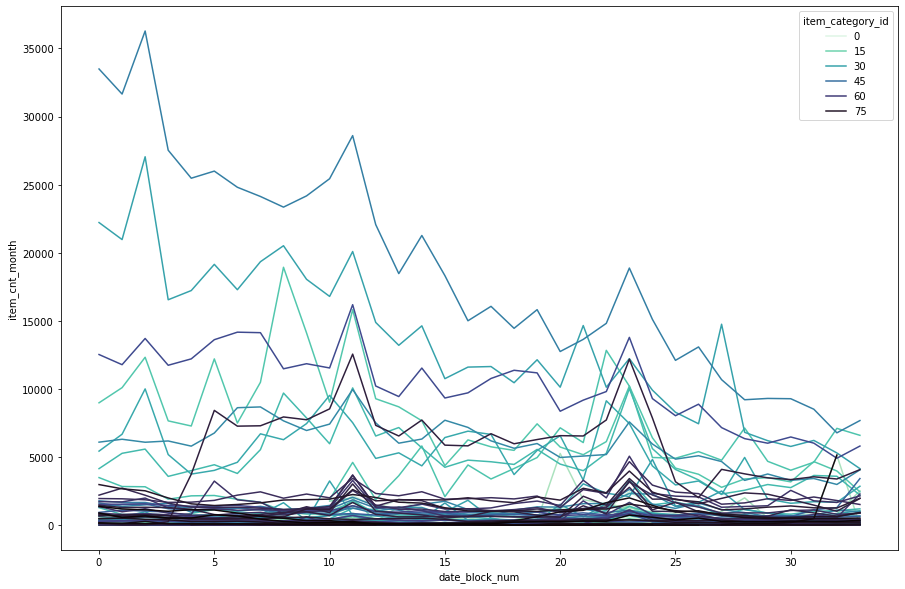

In [98]:
plt.figure(figsize=(15, 10))
palette_1 = sns.color_palette("mako_r", as_cmap=True)

sns.lineplot(x='date_block_num', y='item_cnt_month', data=df_grouped_item_category,
             hue='item_category_id', palette=palette_1);

In [99]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month
0                 0               0            1.00
1                 0               1            1.00
2                 0               3            1.00
3                 1               0            1.00
4                 1               1            1.00

In [101]:
df_grouped_item_category.item_cnt_month.describe()

count    2,077.00
mean     1,756.48
std      3,669.11
min         -1.00
25%        145.00
50%        514.00
75%      1,323.00
max     36,277.00
Name: item_cnt_month, dtype: float64

In [102]:
df_grouped_item_category['log_item_cnt_month'] = np.log(df_grouped_item_category['item_cnt_month'] + 2)

In [143]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month  log_item_cnt_month
0                 0               0            1.00                1.10
1                 0               1            1.00                1.10
2                 0               3            1.00                1.10
3                 1               0            1.00                1.10
4                 1               1            1.00                1.10

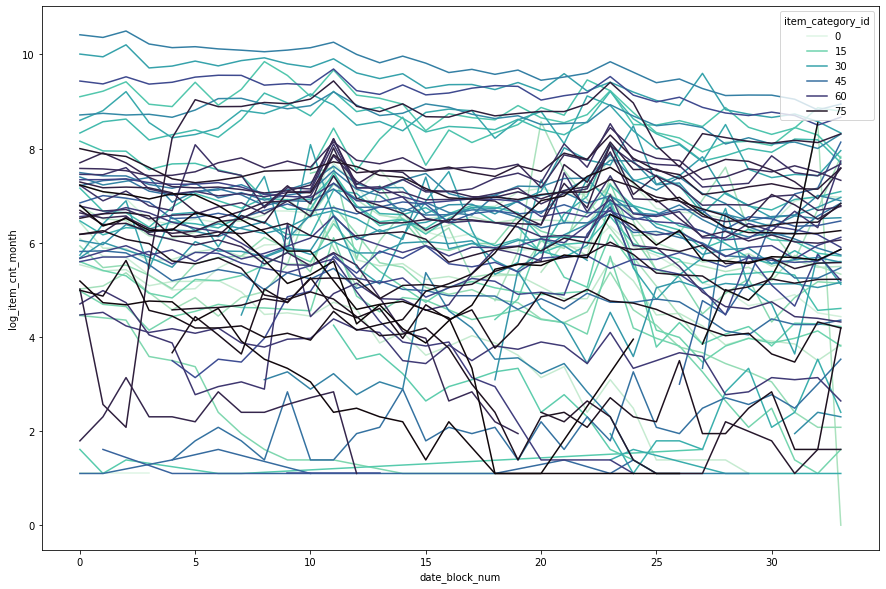

In [104]:
plt.figure(figsize=(15, 10))

sns.lineplot(x='date_block_num', y='log_item_cnt_month', data=df_grouped_item_category,
             hue='item_category_id', palette=palette_1);

In [107]:
item_categories = set(df_grouped_item_category.item_category_id)

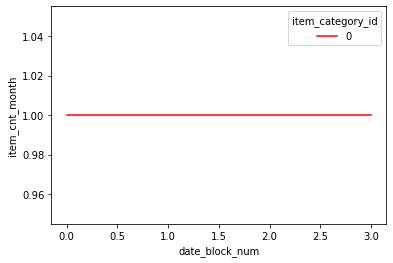

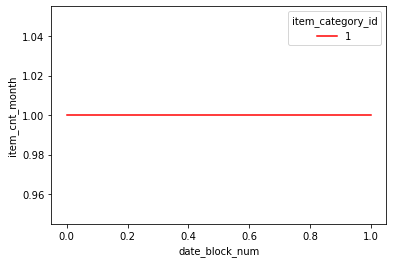

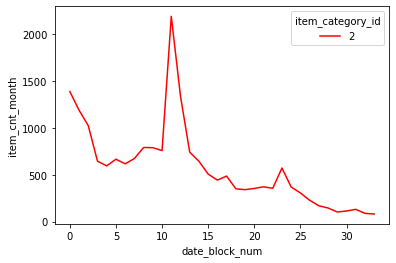

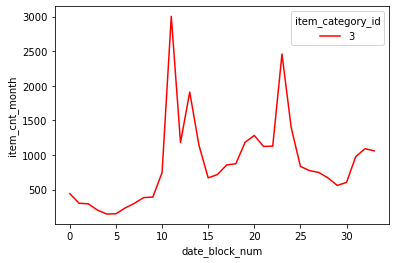

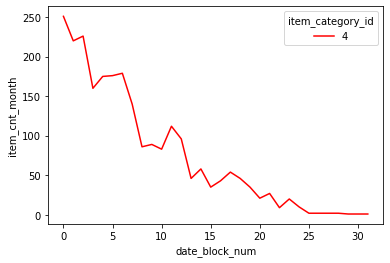

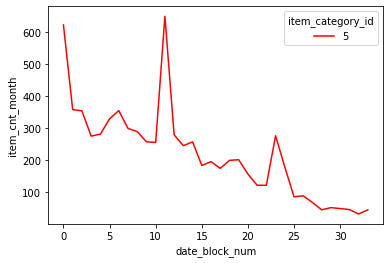

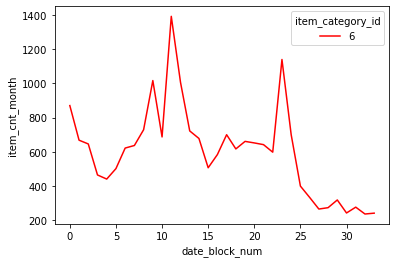

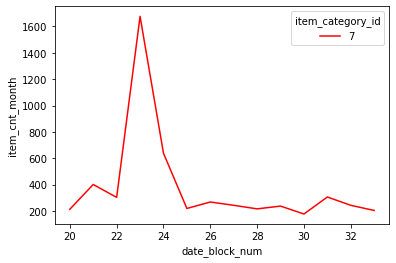

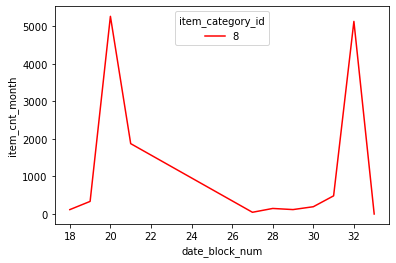

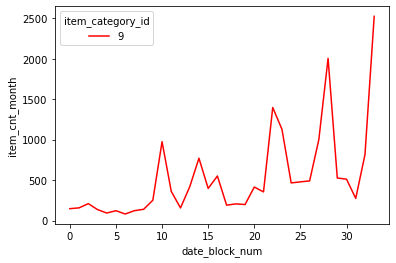

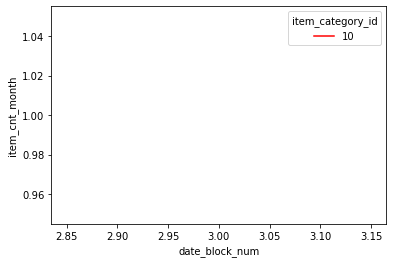

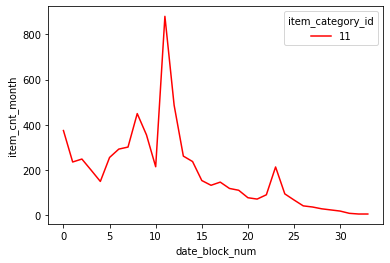

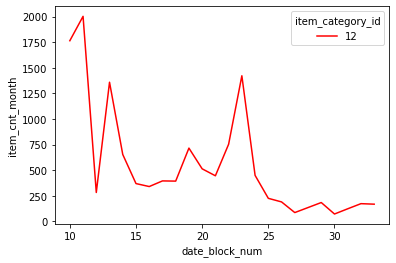

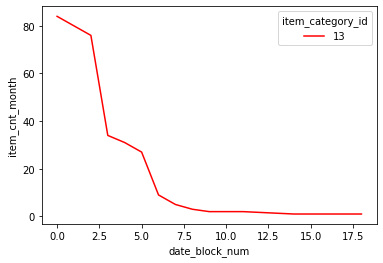

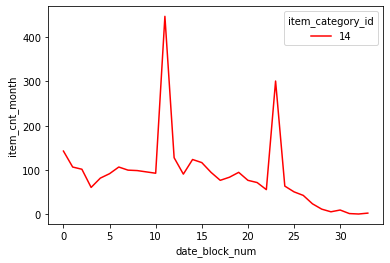

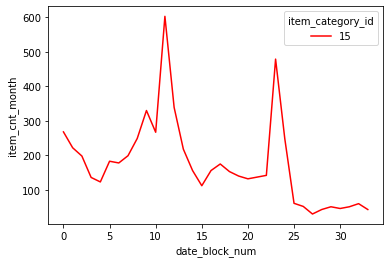

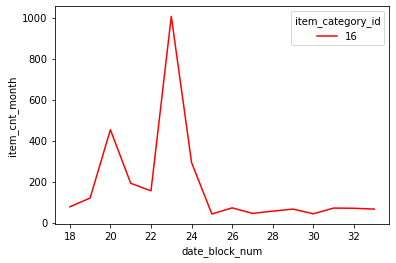

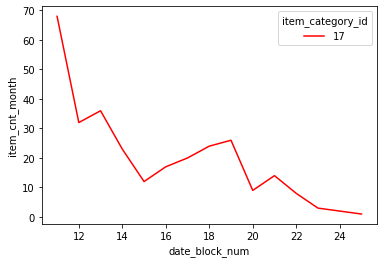

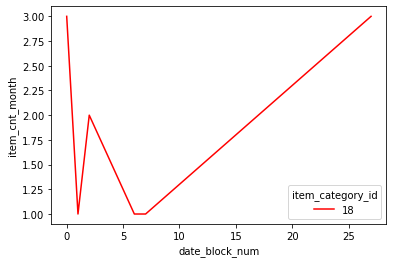

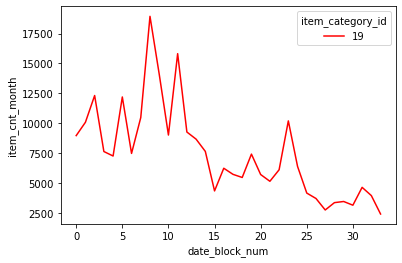

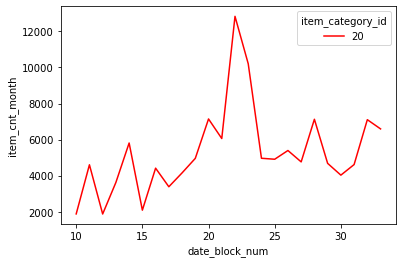

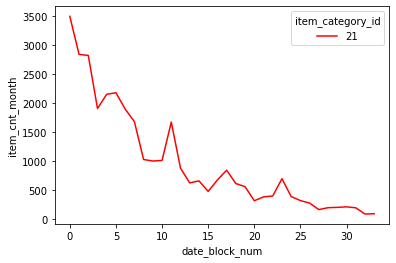

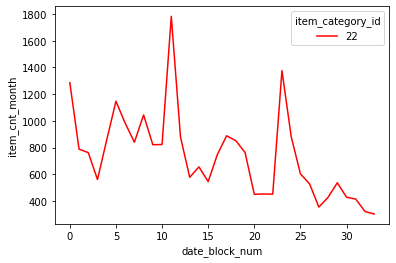

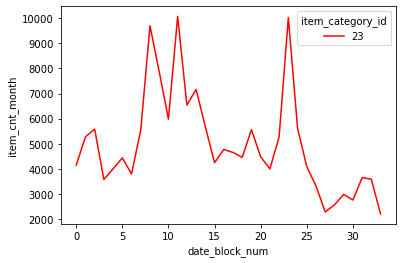

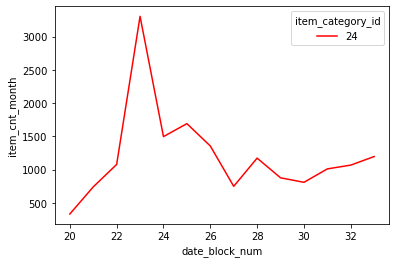

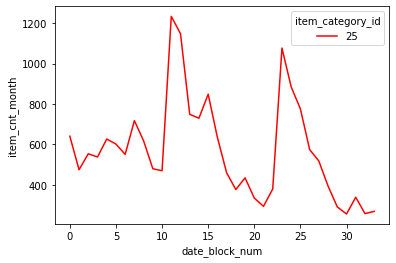

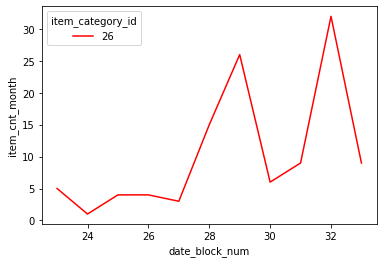

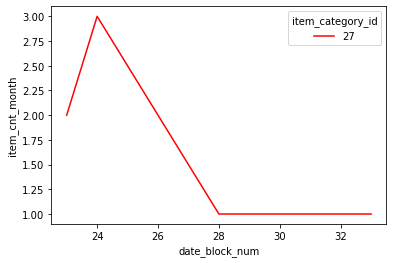

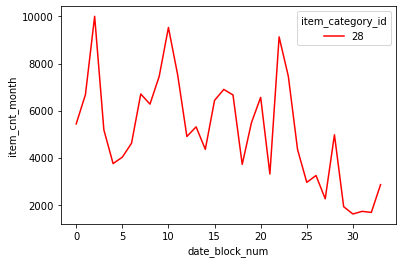

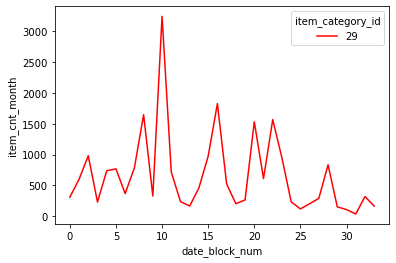

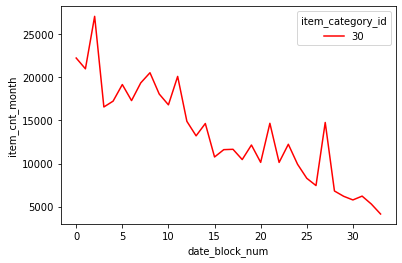

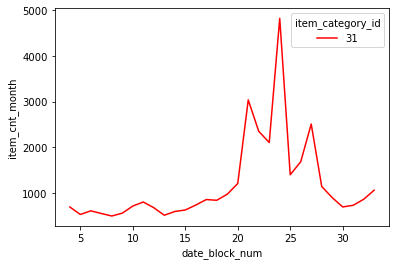

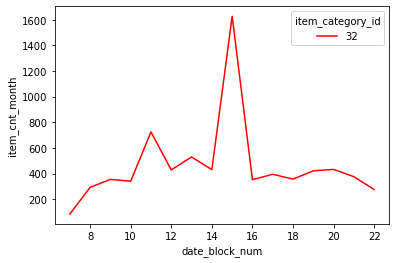

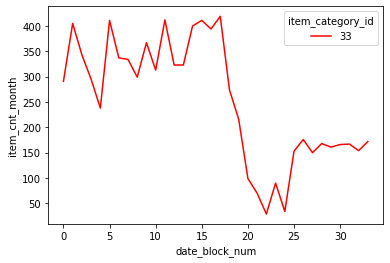

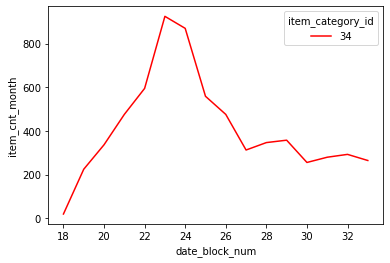

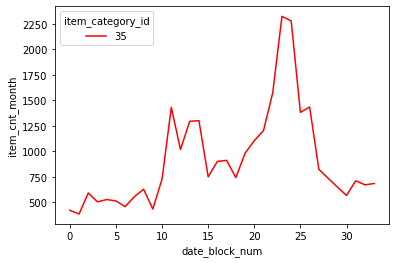

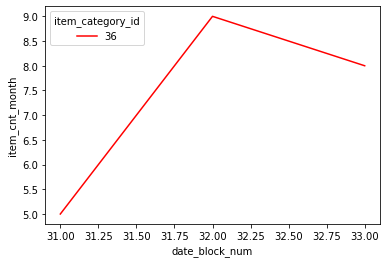

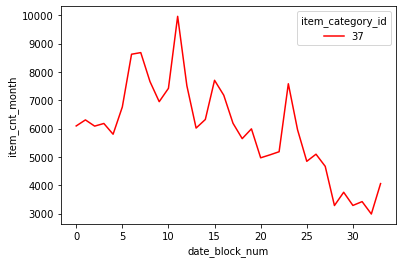

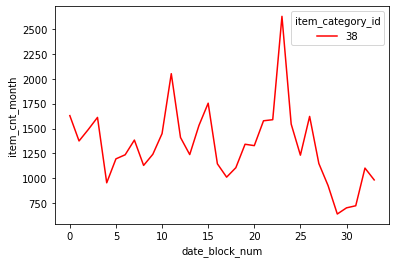

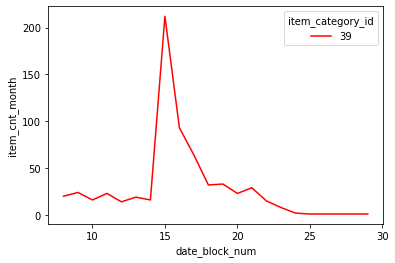

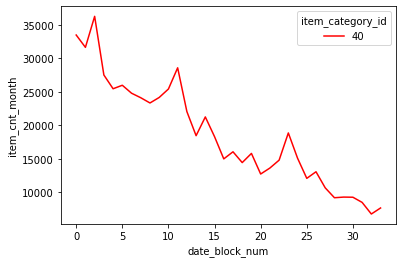

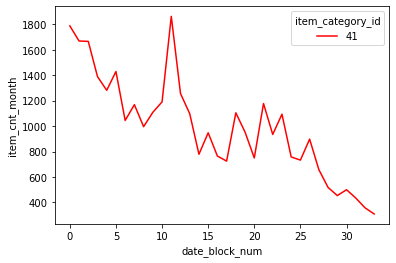

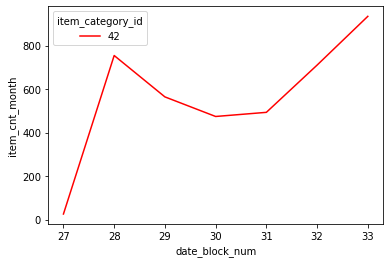

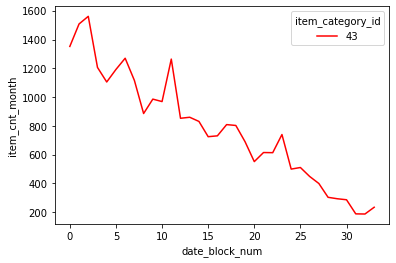

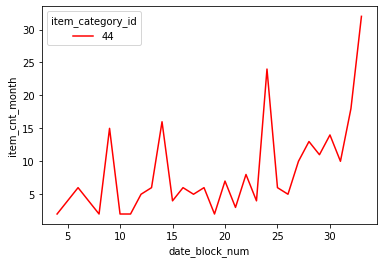

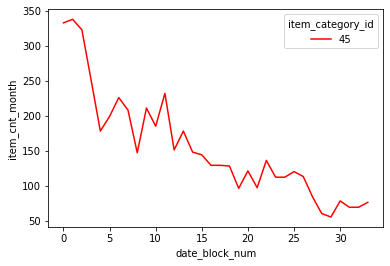

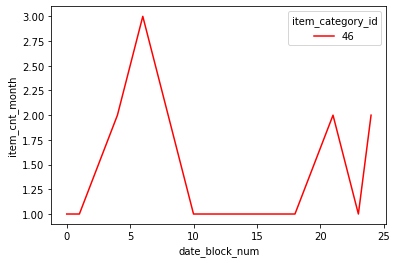

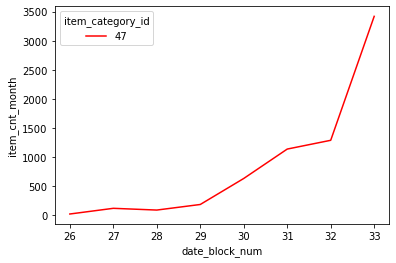

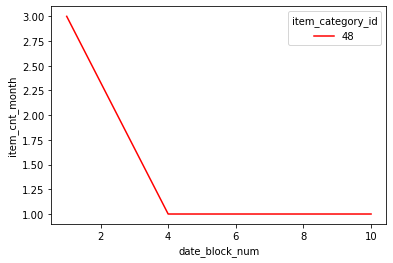

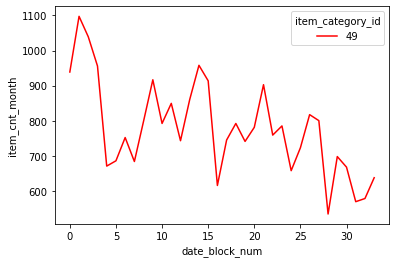

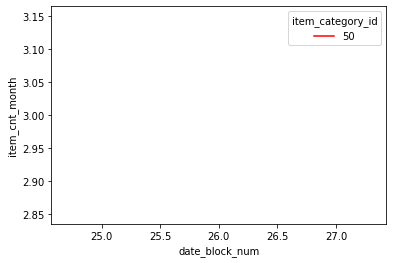

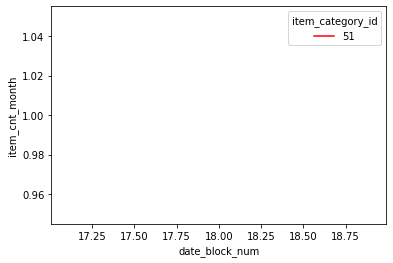

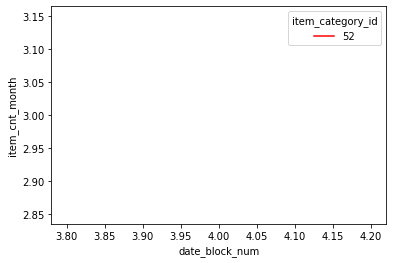

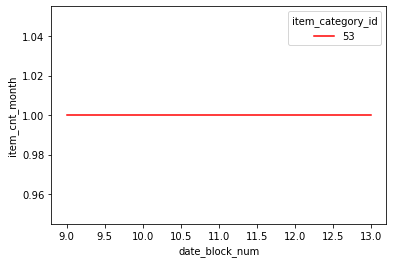

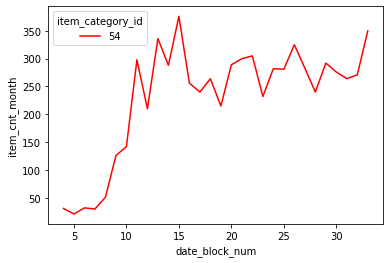

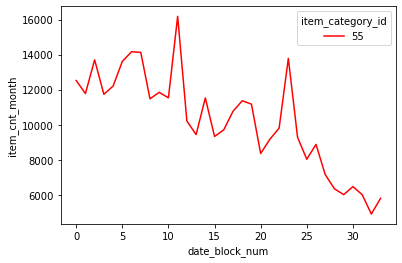

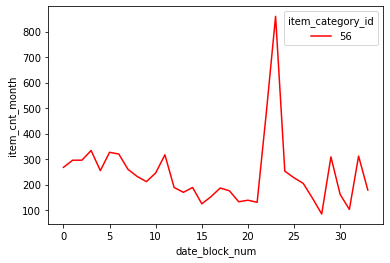

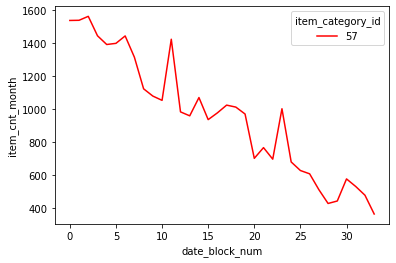

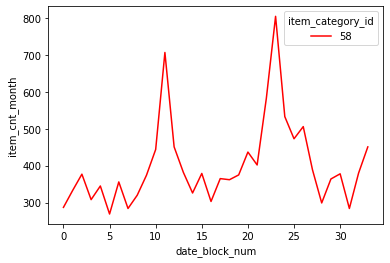

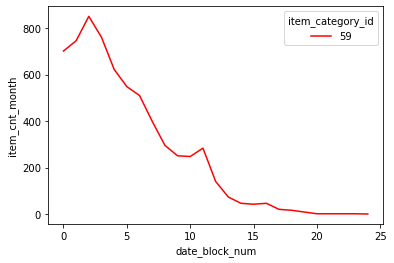

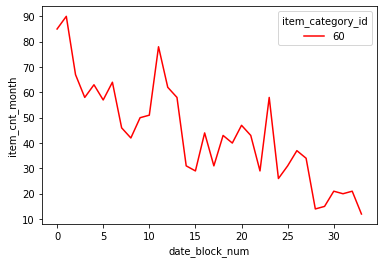

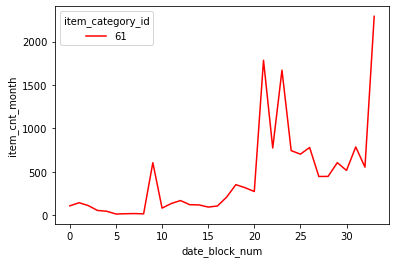

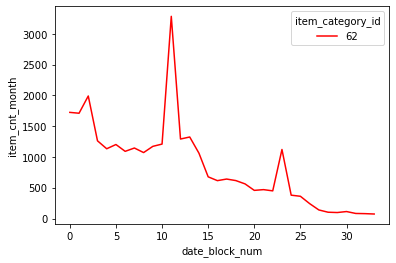

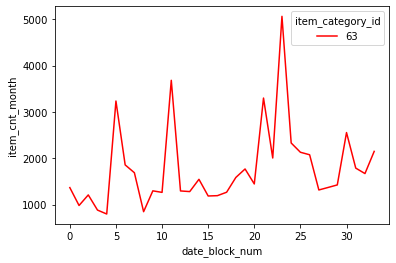

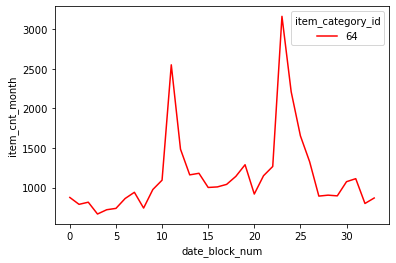

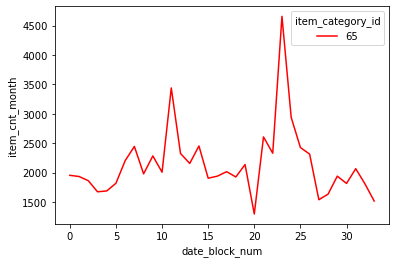

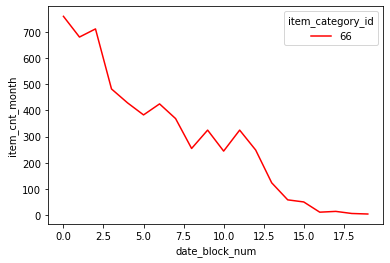

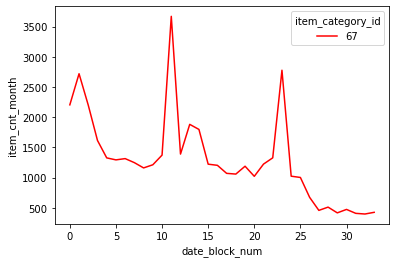

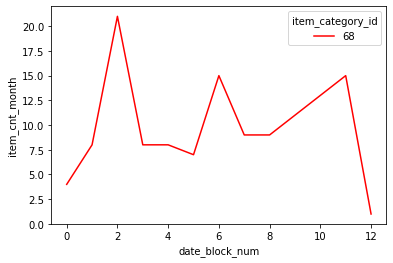

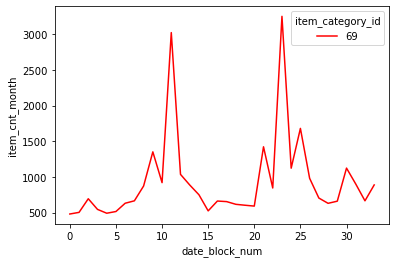

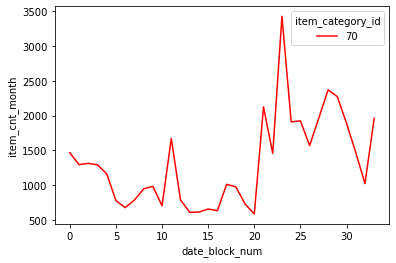

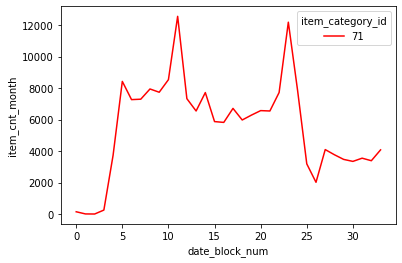

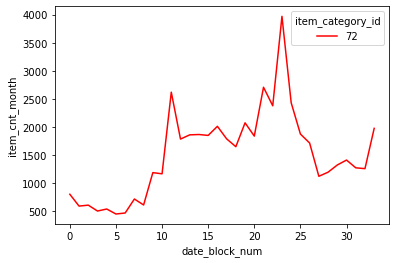

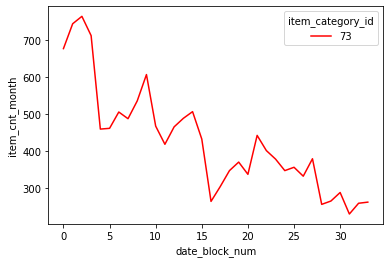

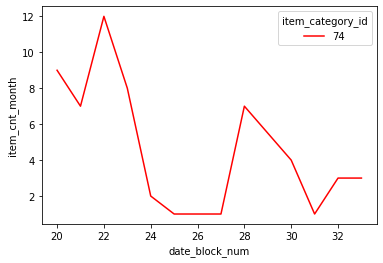

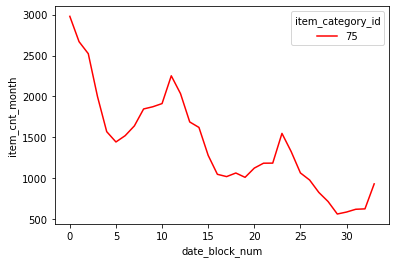

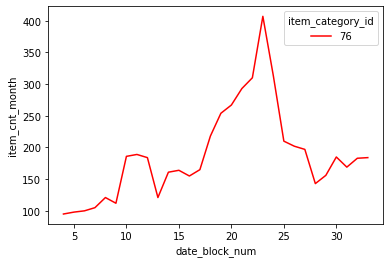

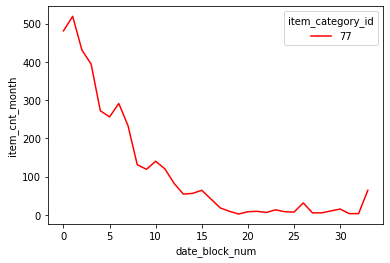

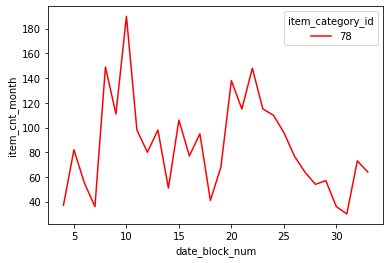

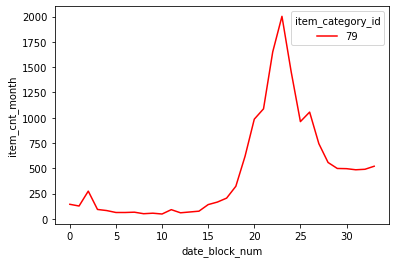

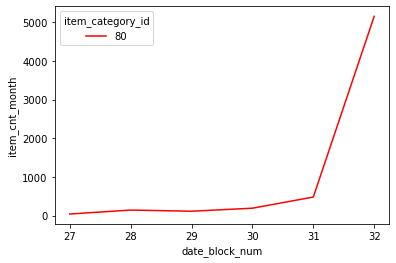

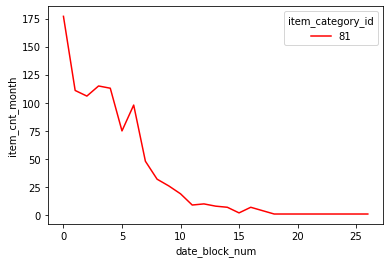

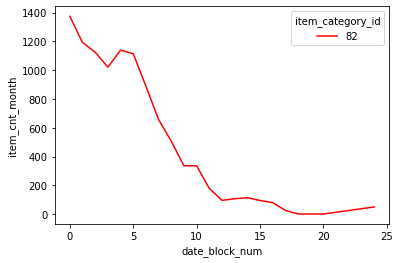

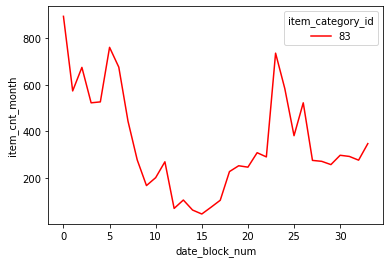

In [125]:
for item_category in item_categories:
    
    sns.lineplot(x='date_block_num', y='item_cnt_month',
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category]);
    plt.show()

In [173]:
def print_info_for_item_category(data, item_category_id):
    
    item_category_data = data[data.item_category_id == item_category_id]
    
    item_date_blocks = set(item_category_data.date_block_num)
    date_blocks = set(data.date_block_num)
    missing_date_blocks = sorted(date_blocks.difference(item_date_blocks))
    
    print('\n', 'CNT_MONTH DESCRIPTION: ', item_category_data['item_cnt_month'].describe())
    
    print('\n', 'MISSING VALUES: ', missing_date_blocks)

ITEM CATEGORY_ID:  0


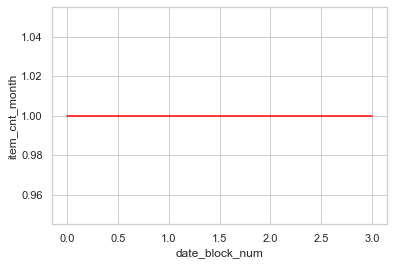

count   3.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


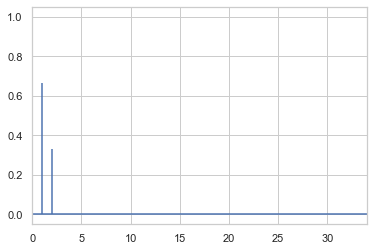


 LOG ITEM CNT MONTH:


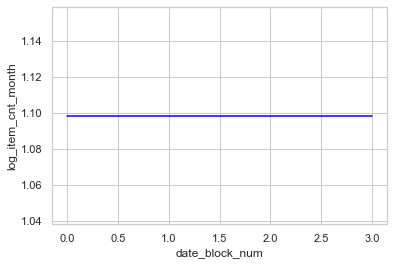


AUTOCORRELATION FOR LOG DATA: 


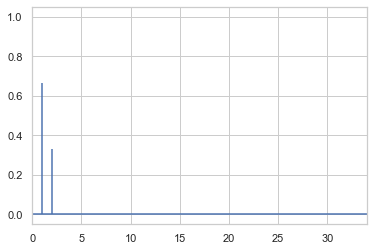

ITEM CATEGORY_ID:  1


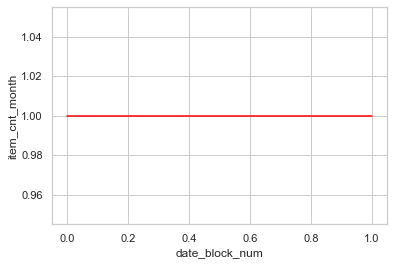

count   2.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


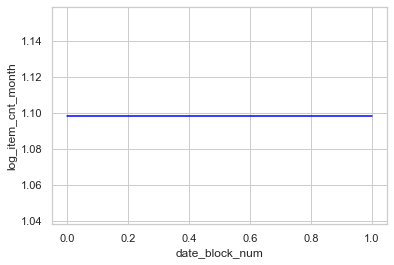


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  2


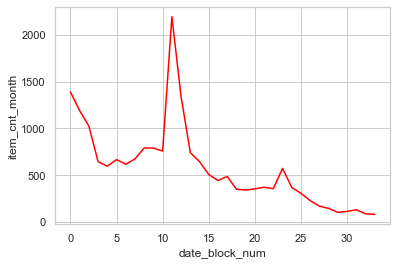

count      34.00
mean      576.38
std       446.92
min        82.00
25%       315.75
50%       497.50
75%       725.00
max     2,192.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


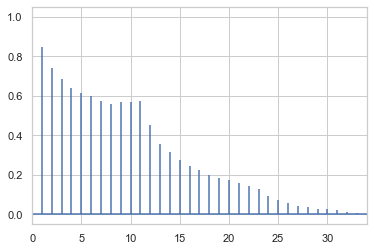


 LOG ITEM CNT MONTH:


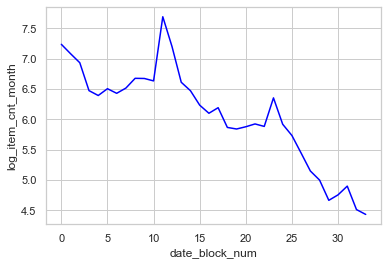


AUTOCORRELATION FOR LOG DATA: 


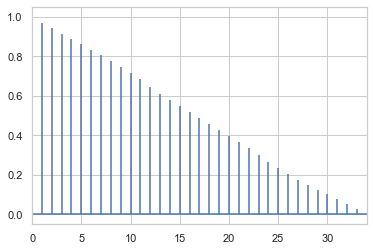

ITEM CATEGORY_ID:  3


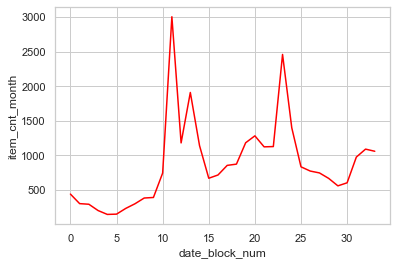

count      34.00
mean      876.68
std       626.17
min       146.00
25%       403.25
50%       759.50
75%     1,126.00
max     3,004.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


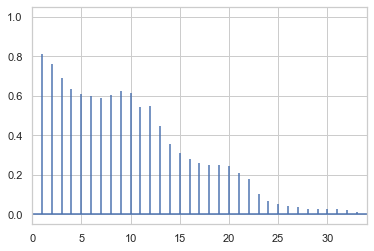


 LOG ITEM CNT MONTH:


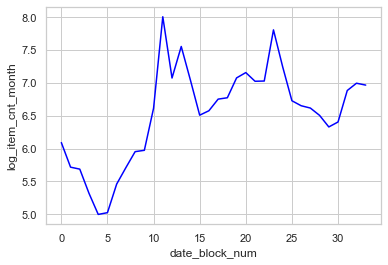


AUTOCORRELATION FOR LOG DATA: 


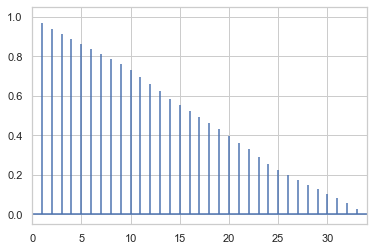

ITEM CATEGORY_ID:  4


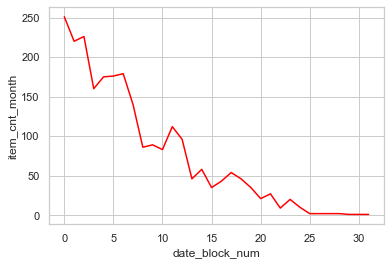

count    31.00
mean     77.65
std      76.37
min       1.00
25%      15.00
50%      46.00
75%     126.00
max     251.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [30, 32, 33]

AUTOCORRELATION: 


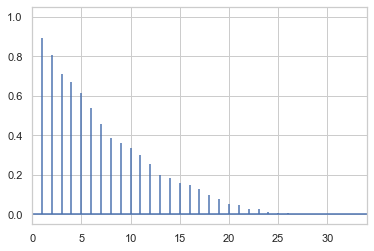


 LOG ITEM CNT MONTH:


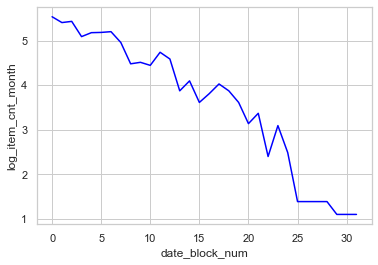


AUTOCORRELATION FOR LOG DATA: 


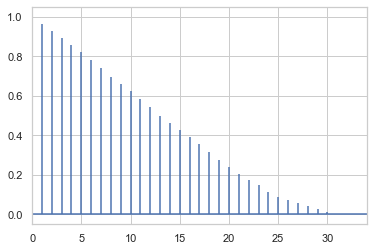

ITEM CATEGORY_ID:  5


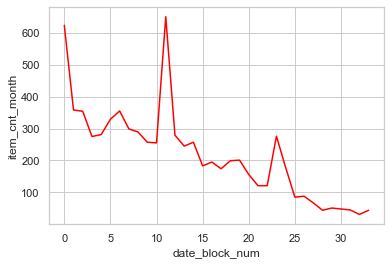

count    34.00
mean    218.03
std     147.62
min      31.00
25%      96.25
50%     200.00
75%     280.50
max     650.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


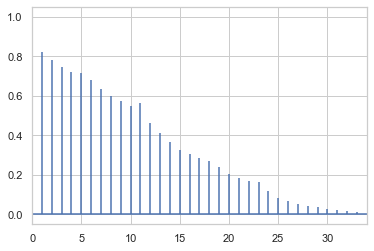


 LOG ITEM CNT MONTH:


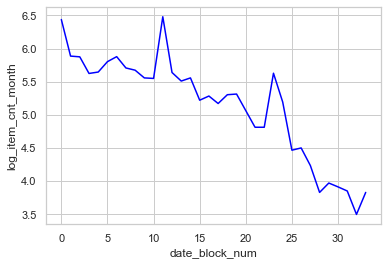


AUTOCORRELATION FOR LOG DATA: 


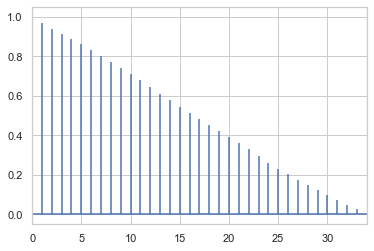

ITEM CATEGORY_ID:  6


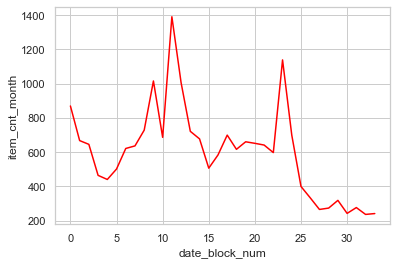

count      34.00
mean      602.12
std       268.01
min       237.00
25%       410.25
50%       629.50
75%       696.75
max     1,391.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


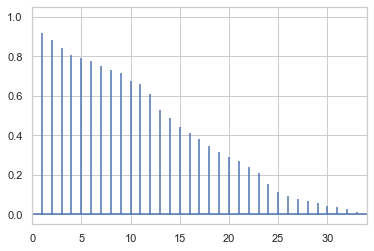


 LOG ITEM CNT MONTH:


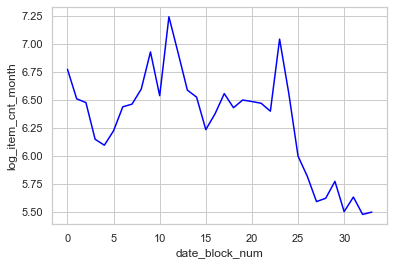


AUTOCORRELATION FOR LOG DATA: 


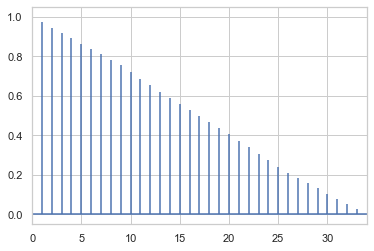

ITEM CATEGORY_ID:  7


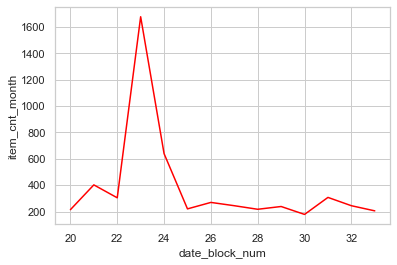

count      14.00
mean      382.71
std       390.40
min       178.00
25%       217.75
50%       244.00
75%       306.25
max     1,677.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

AUTOCORRELATION: 


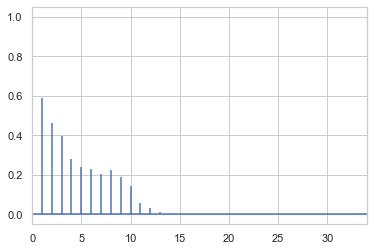


 LOG ITEM CNT MONTH:


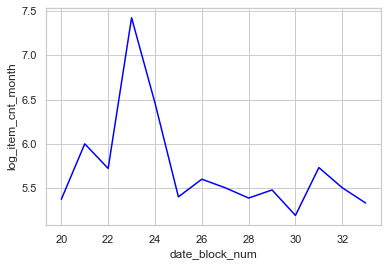


AUTOCORRELATION FOR LOG DATA: 


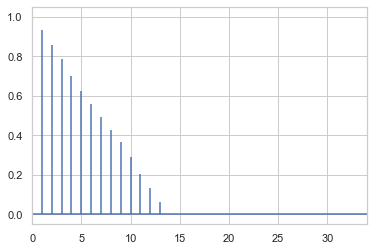

ITEM CATEGORY_ID:  8


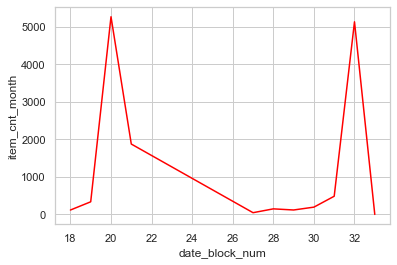

count      11.00
mean    1,245.36
std     2,021.81
min        -1.00
25%       116.50
50%       193.00
75%     1,178.00
max     5,263.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26]

AUTOCORRELATION: 


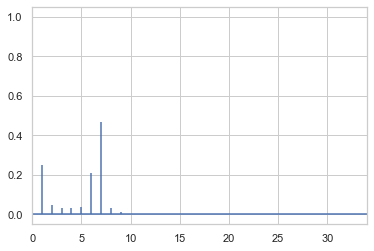


 LOG ITEM CNT MONTH:


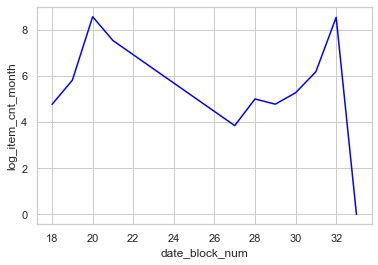


AUTOCORRELATION FOR LOG DATA: 


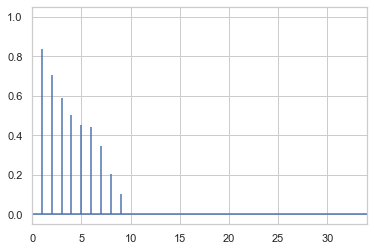

ITEM CATEGORY_ID:  9


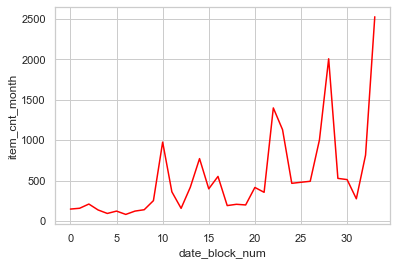

count      34.00
mean      532.88
std       549.13
min        83.00
25%       167.25
50%       380.50
75%       546.00
max     2,524.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


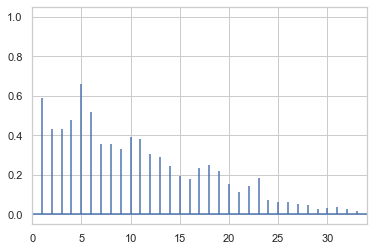


 LOG ITEM CNT MONTH:


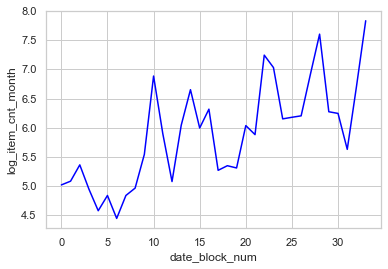


AUTOCORRELATION FOR LOG DATA: 


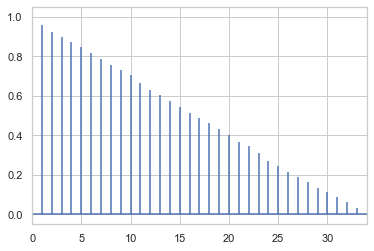

ITEM CATEGORY_ID:  10


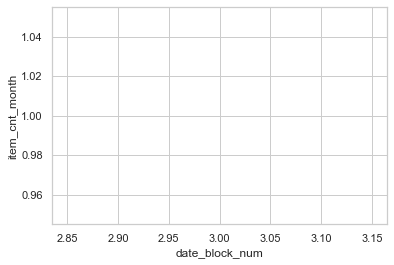

count   1.00
mean    1.00
std      nan
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


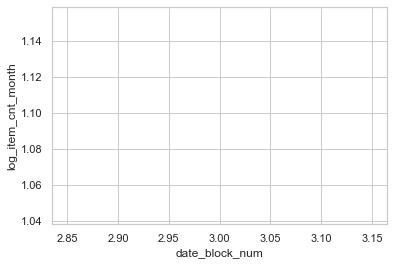


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  11


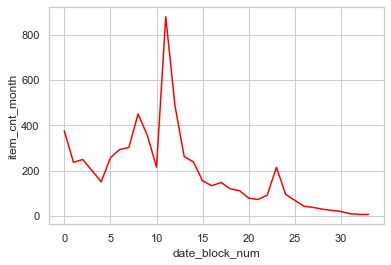

count    34.00
mean    188.32
std     177.82
min       6.00
25%      69.00
50%     148.50
75%     254.25
max     880.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


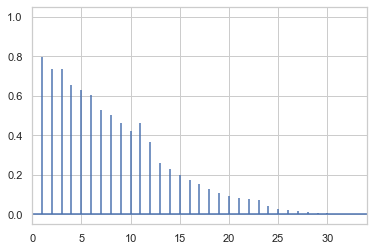


 LOG ITEM CNT MONTH:


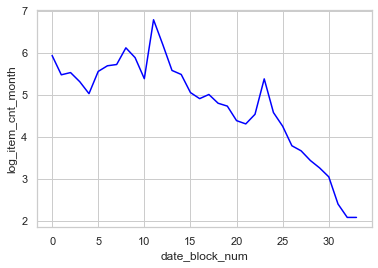


AUTOCORRELATION FOR LOG DATA: 


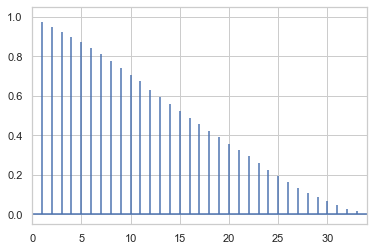

ITEM CATEGORY_ID:  12


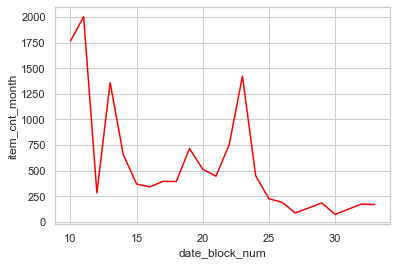

count      24.00
mean      551.25
std       541.45
min        73.00
25%       182.25
50%       382.00
75%       669.50
max     2,002.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

AUTOCORRELATION: 


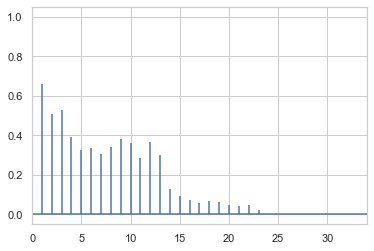


 LOG ITEM CNT MONTH:


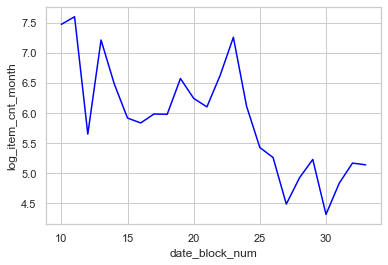


AUTOCORRELATION FOR LOG DATA: 


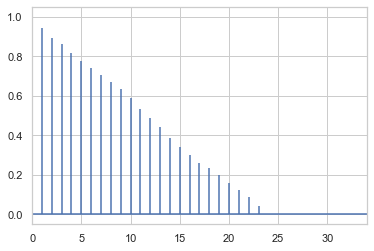

ITEM CATEGORY_ID:  13


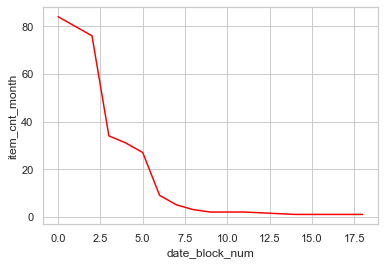

count   15.00
mean    23.80
std     31.29
min      1.00
25%      1.50
50%      5.00
75%     32.50
max     84.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [10, 12, 13, 15, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


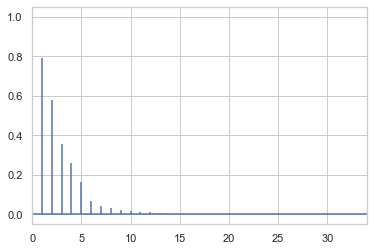


 LOG ITEM CNT MONTH:


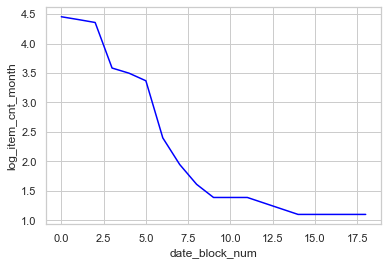


AUTOCORRELATION FOR LOG DATA: 


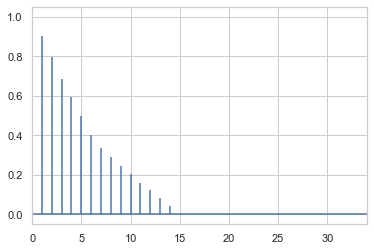

ITEM CATEGORY_ID:  14


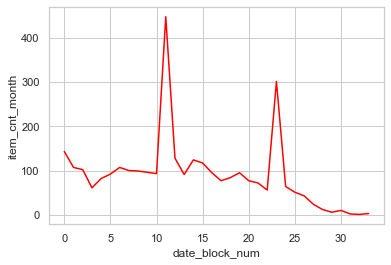

count    34.00
mean     90.06
std      84.10
min       1.00
25%      52.25
50%      87.50
75%     101.50
max     447.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


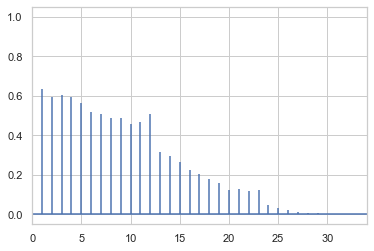


 LOG ITEM CNT MONTH:


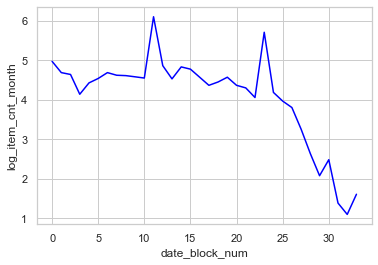


AUTOCORRELATION FOR LOG DATA: 


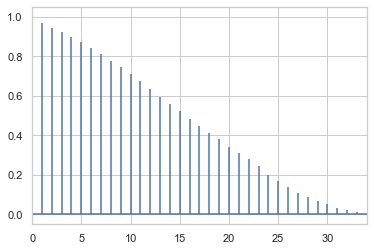

ITEM CATEGORY_ID:  15


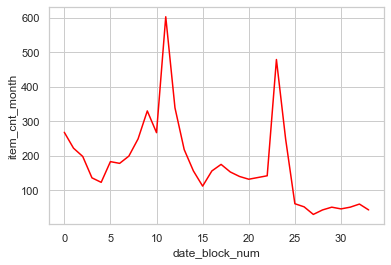

count    34.00
mean    175.88
std     125.44
min      30.00
25%      73.75
50%     154.50
75%     221.00
max     603.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


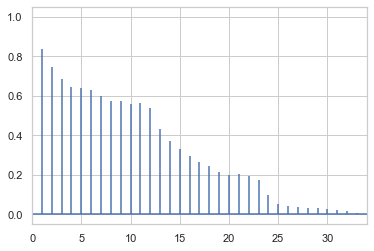


 LOG ITEM CNT MONTH:


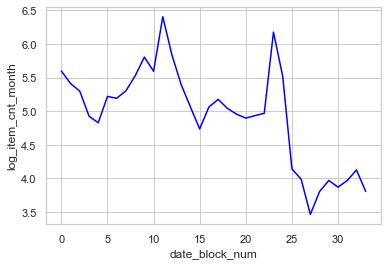


AUTOCORRELATION FOR LOG DATA: 


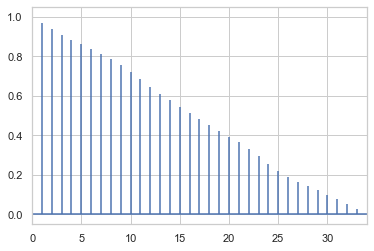

ITEM CATEGORY_ID:  16


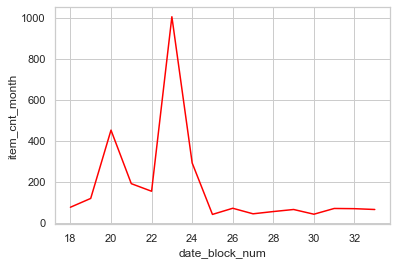

count      16.00
mean      176.69
std       247.31
min        42.00
25%        63.50
50%        71.50
75%       164.25
max     1,006.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

AUTOCORRELATION: 


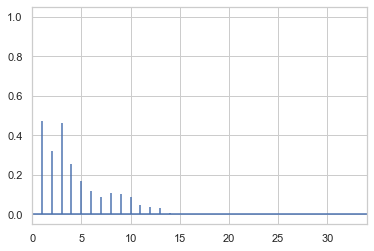


 LOG ITEM CNT MONTH:


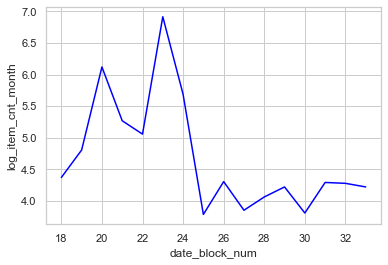


AUTOCORRELATION FOR LOG DATA: 


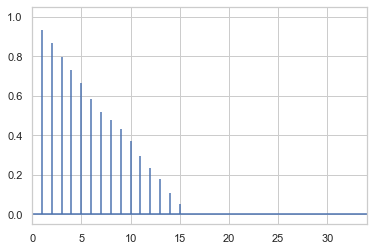

ITEM CATEGORY_ID:  17


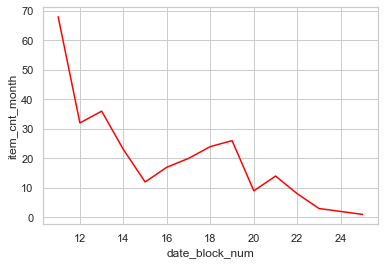

count   15.00
mean    19.67
std     17.14
min      1.00
25%      8.50
50%     17.00
75%     25.00
max     68.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


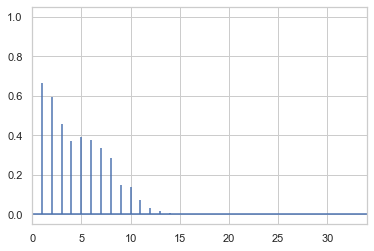


 LOG ITEM CNT MONTH:


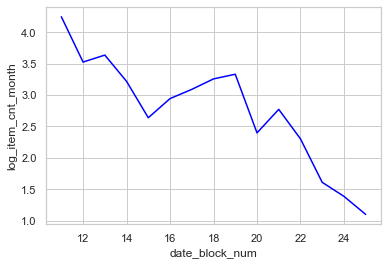


AUTOCORRELATION FOR LOG DATA: 


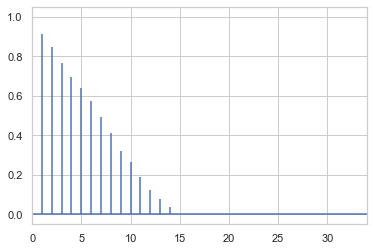

ITEM CATEGORY_ID:  18


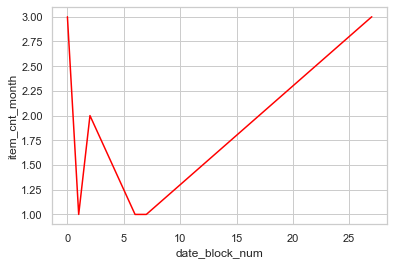

count   6.00
mean    1.83
std     0.98
min     1.00
25%     1.00
50%     1.50
75%     2.75
max     3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


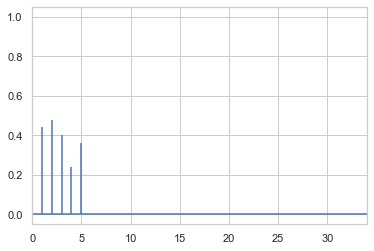


 LOG ITEM CNT MONTH:


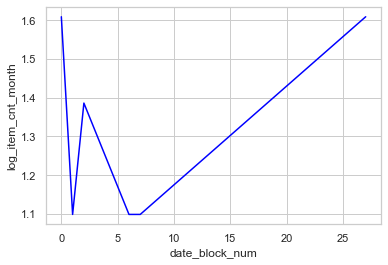


AUTOCORRELATION FOR LOG DATA: 


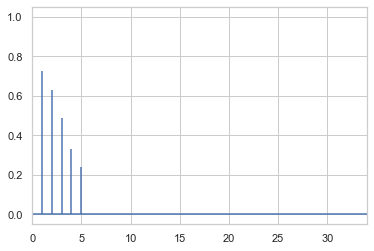

ITEM CATEGORY_ID:  19


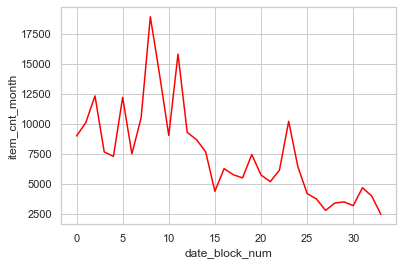

count       34.00
mean     7,496.68
std      3,878.32
min      2,443.00
25%      4,443.50
50%      6,846.50
75%      9,219.00
max     18,932.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


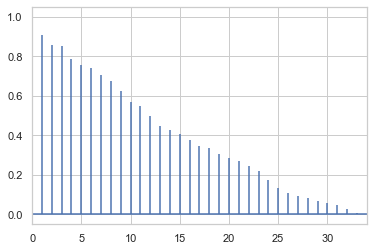


 LOG ITEM CNT MONTH:


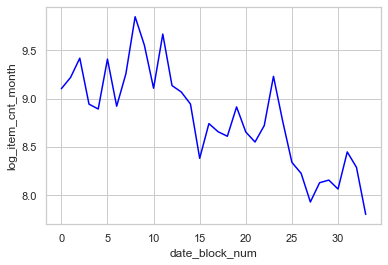


AUTOCORRELATION FOR LOG DATA: 


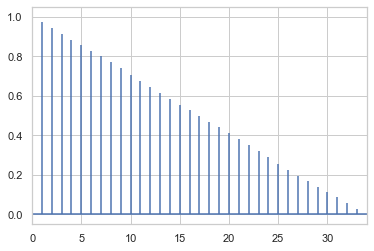

ITEM CATEGORY_ID:  20


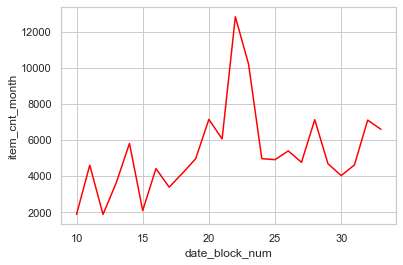

count       24.00
mean     5,304.96
std      2,459.30
min      1,880.00
25%      4,127.00
50%      4,841.50
75%      6,196.25
max     12,834.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

AUTOCORRELATION: 


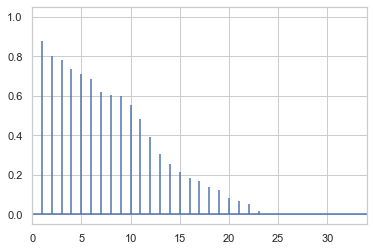


 LOG ITEM CNT MONTH:


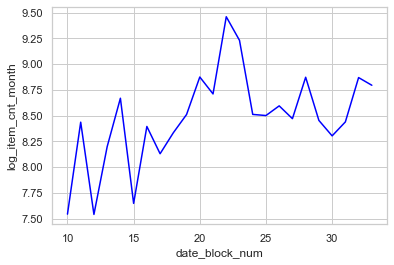


AUTOCORRELATION FOR LOG DATA: 


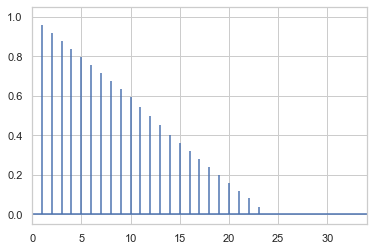

ITEM CATEGORY_ID:  21


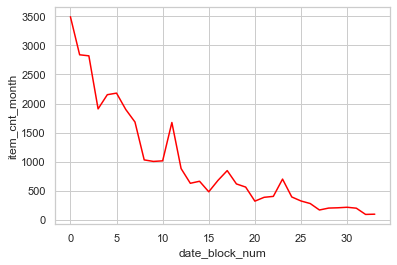

count      34.00
mean      972.53
std       897.71
min        94.00
25%       322.75
50%       646.50
75%     1,513.25
max     3,492.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


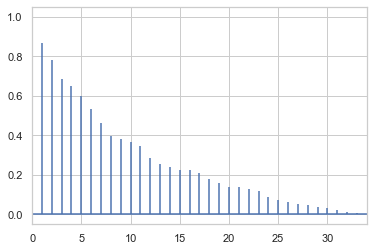


 LOG ITEM CNT MONTH:


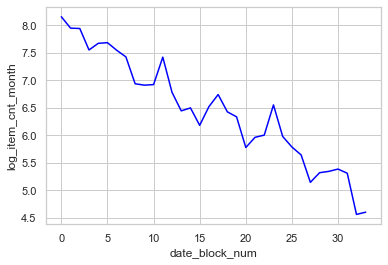


AUTOCORRELATION FOR LOG DATA: 


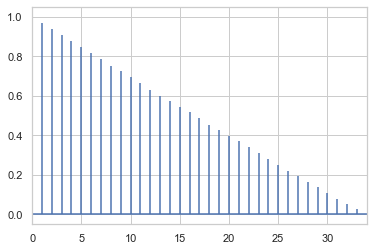

ITEM CATEGORY_ID:  22


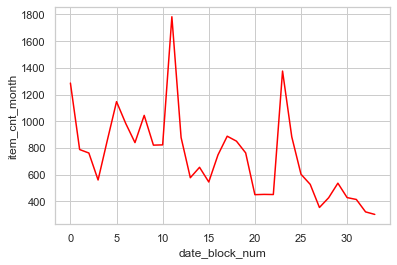

count      34.00
mean      738.91
std       325.68
min       302.00
25%       470.75
50%       755.00
75%       872.75
max     1,783.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


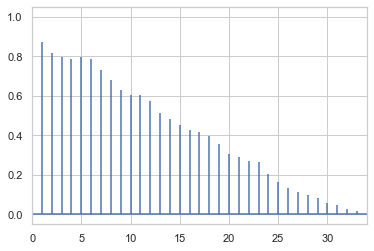


 LOG ITEM CNT MONTH:


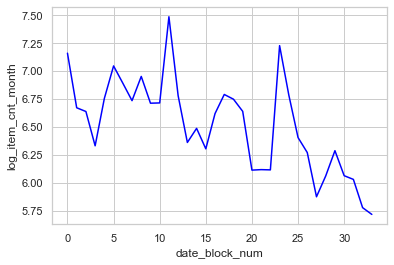


AUTOCORRELATION FOR LOG DATA: 


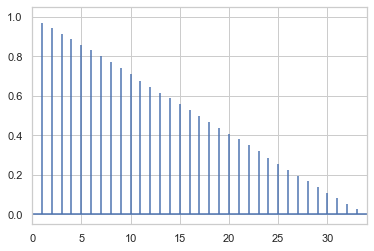

ITEM CATEGORY_ID:  23


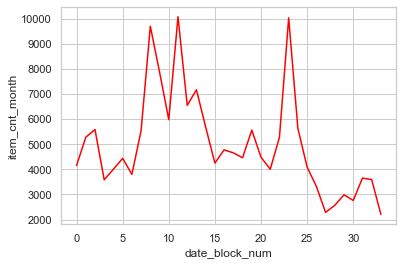

count       34.00
mean     4,998.35
std      2,036.38
min      2,203.00
25%      3,686.75
50%      4,471.00
75%      5,611.00
max     10,076.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


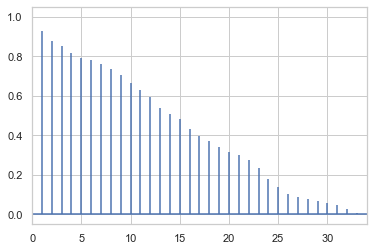


 LOG ITEM CNT MONTH:


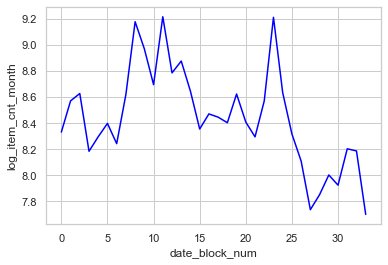


AUTOCORRELATION FOR LOG DATA: 


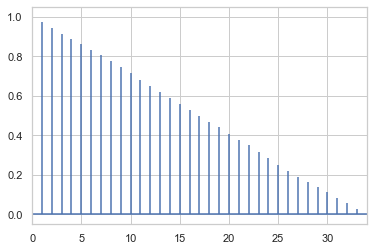

ITEM CATEGORY_ID:  24


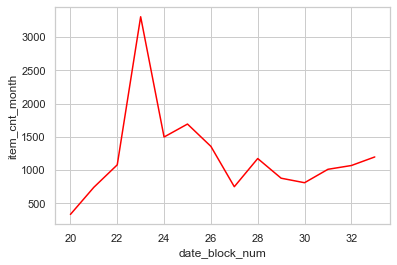

count      14.00
mean    1,206.14
std       695.48
min       332.00
25%       826.00
50%     1,073.00
75%     1,316.25
max     3,307.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

AUTOCORRELATION: 


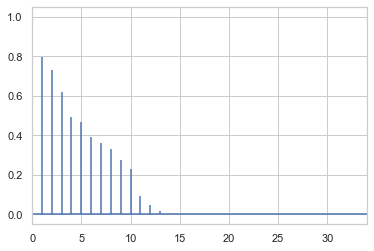


 LOG ITEM CNT MONTH:


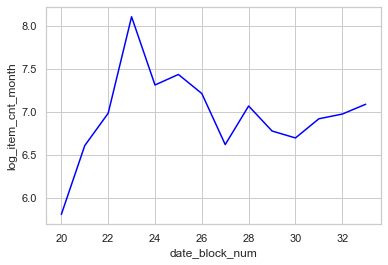


AUTOCORRELATION FOR LOG DATA: 


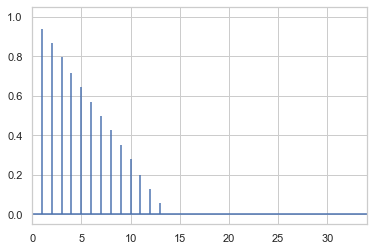

ITEM CATEGORY_ID:  25


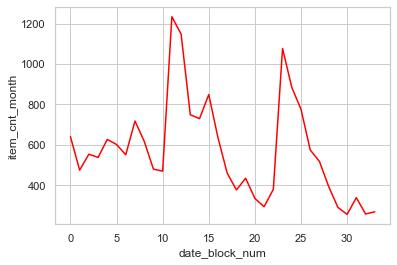

count      34.00
mean      574.65
std       249.94
min       256.00
25%       383.50
50%       544.50
75%       698.75
max     1,234.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


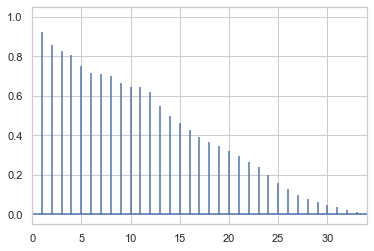


 LOG ITEM CNT MONTH:


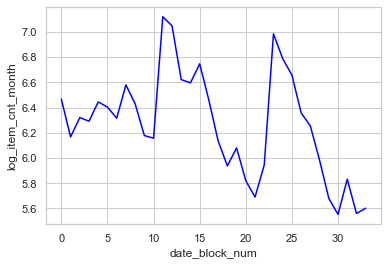


AUTOCORRELATION FOR LOG DATA: 


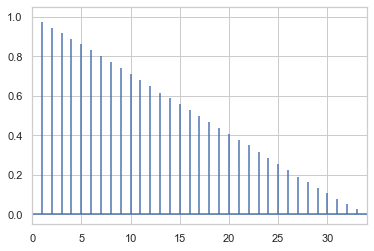

ITEM CATEGORY_ID:  26


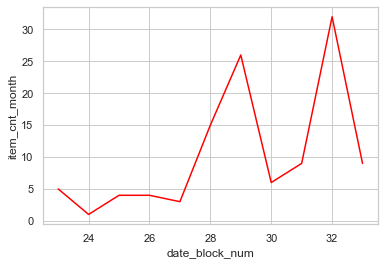

count   11.00
mean    10.36
std     10.04
min      1.00
25%      4.00
50%      6.00
75%     12.00
max     32.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

AUTOCORRELATION: 


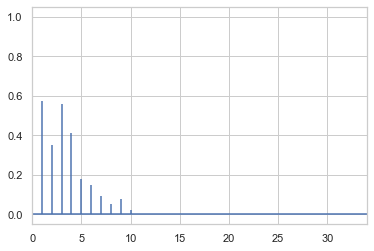


 LOG ITEM CNT MONTH:


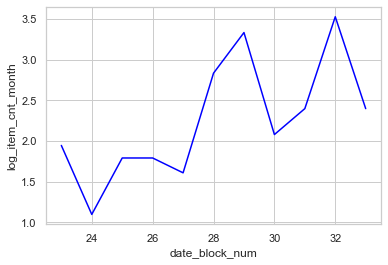


AUTOCORRELATION FOR LOG DATA: 


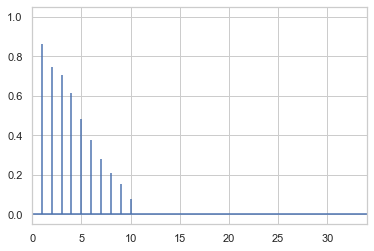

ITEM CATEGORY_ID:  27


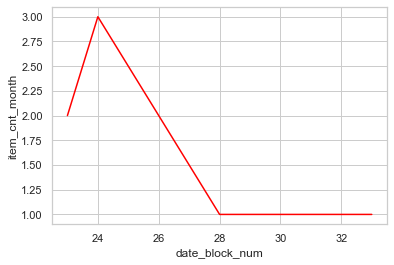

count   5.00
mean    1.60
std     0.89
min     1.00
25%     1.00
50%     1.00
75%     2.00
max     3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 29, 30, 32]

AUTOCORRELATION: 


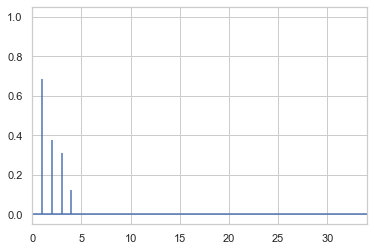


 LOG ITEM CNT MONTH:


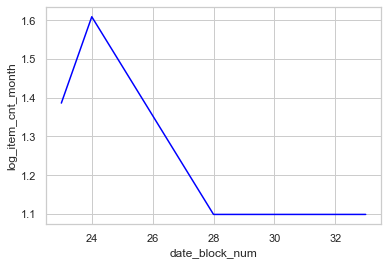


AUTOCORRELATION FOR LOG DATA: 


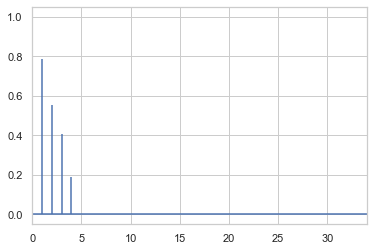

ITEM CATEGORY_ID:  28


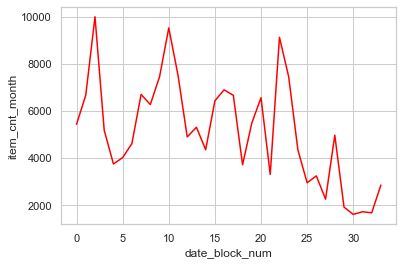

count       34.00
mean     5,145.71
std      2,264.95
min      1,609.00
25%      3,410.75
50%      5,078.00
75%      6,673.00
max     10,003.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


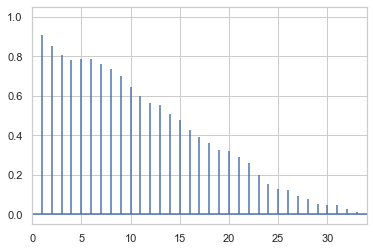


 LOG ITEM CNT MONTH:


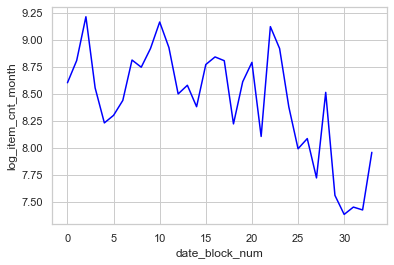


AUTOCORRELATION FOR LOG DATA: 


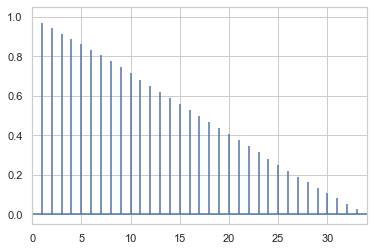

ITEM CATEGORY_ID:  29


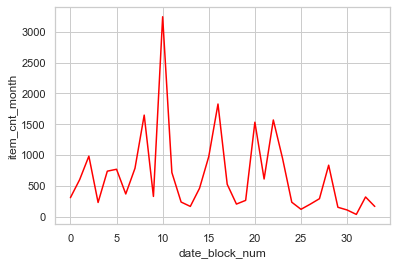

count      34.00
mean      661.65
std       661.76
min        36.00
25%       231.00
50%       414.50
75%       822.50
max     3,245.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


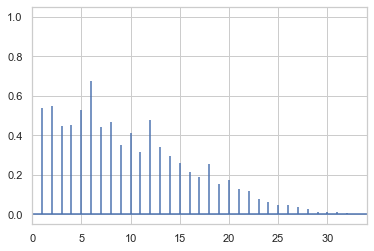


 LOG ITEM CNT MONTH:


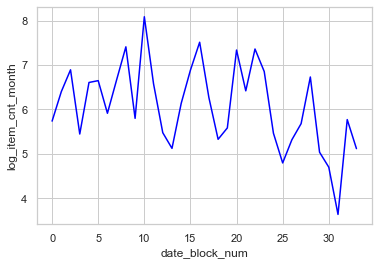


AUTOCORRELATION FOR LOG DATA: 


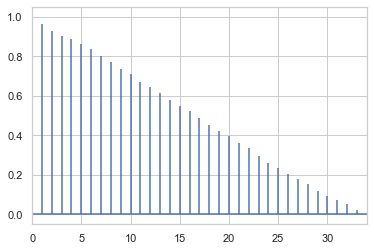

ITEM CATEGORY_ID:  30


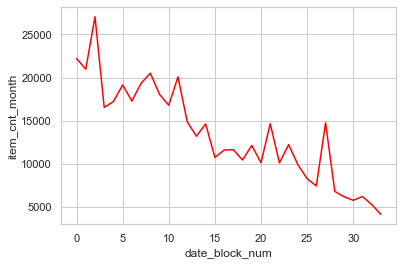

count       34.00
mean    13,427.65
std      5,615.52
min      4,150.00
25%      9,965.25
50%     12,715.00
75%     17,269.50
max     27,045.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


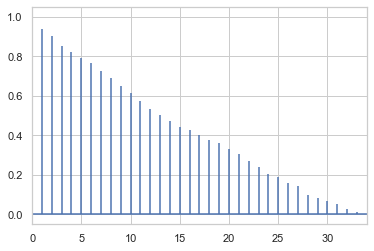


 LOG ITEM CNT MONTH:


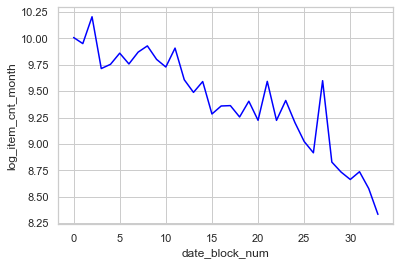


AUTOCORRELATION FOR LOG DATA: 


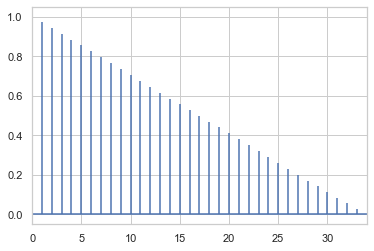

ITEM CATEGORY_ID:  31


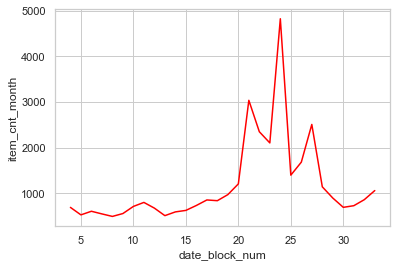

count      30.00
mean    1,170.27
std       949.45
min       489.00
25%       633.50
50%       815.00
75%     1,186.00
max     4,824.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3]

AUTOCORRELATION: 


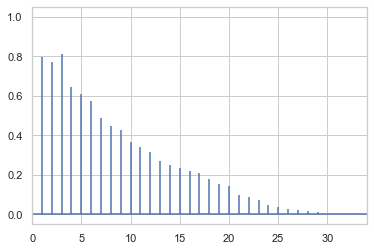


 LOG ITEM CNT MONTH:


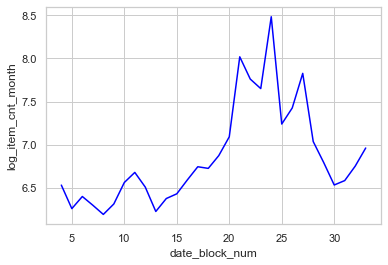


AUTOCORRELATION FOR LOG DATA: 


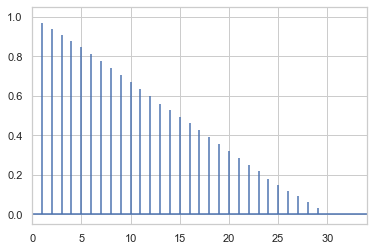

ITEM CATEGORY_ID:  32


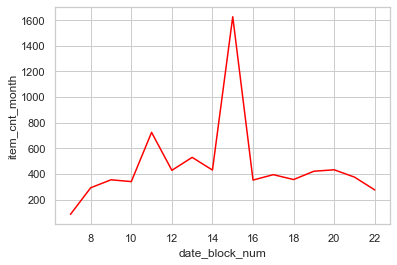

count      16.00
mean      464.25
std       336.81
min        85.00
25%       350.00
50%       385.50
75%       431.50
max     1,627.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


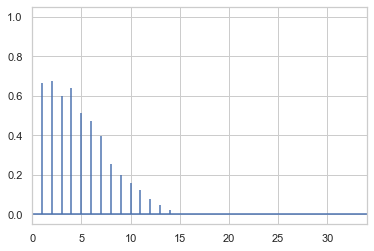


 LOG ITEM CNT MONTH:


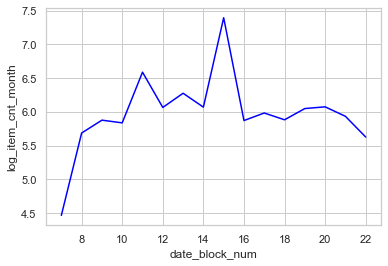


AUTOCORRELATION FOR LOG DATA: 


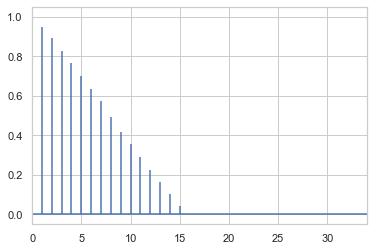

ITEM CATEGORY_ID:  33


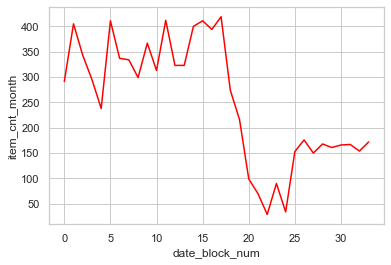

count    34.00
mean    252.76
std     120.39
min      29.00
25%     162.25
50%     282.50
75%     341.50
max     419.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


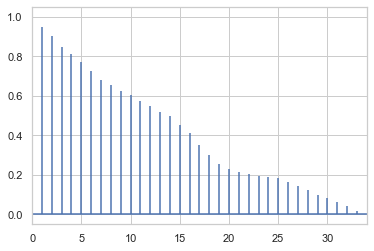


 LOG ITEM CNT MONTH:


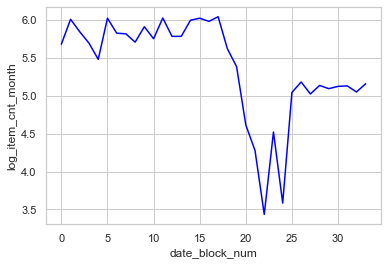


AUTOCORRELATION FOR LOG DATA: 


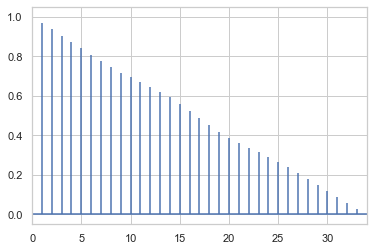

ITEM CATEGORY_ID:  34


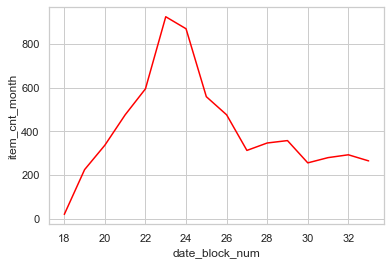

count    16.00
mean    412.19
std     234.51
min      20.00
25%     276.25
50%     342.00
75%     496.75
max     925.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

AUTOCORRELATION: 


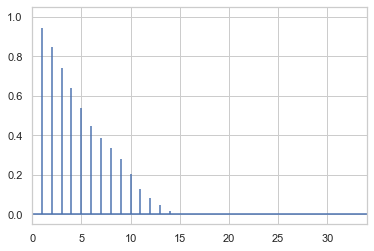


 LOG ITEM CNT MONTH:


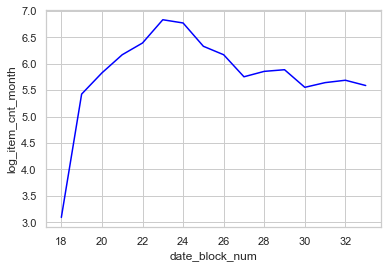


AUTOCORRELATION FOR LOG DATA: 


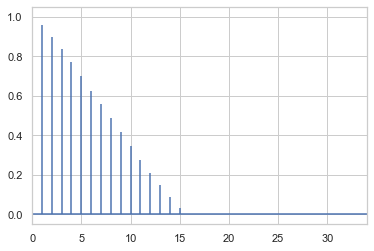

ITEM CATEGORY_ID:  35


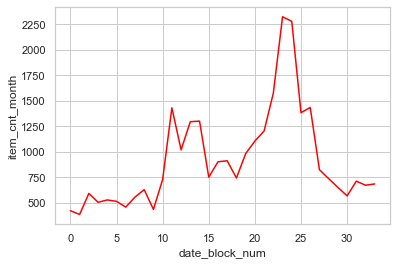

count      34.00
mean      918.94
std       482.89
min       386.00
25%       574.00
50%       740.00
75%     1,179.25
max     2,324.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


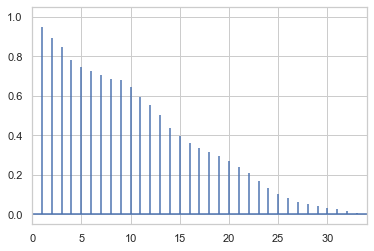


 LOG ITEM CNT MONTH:


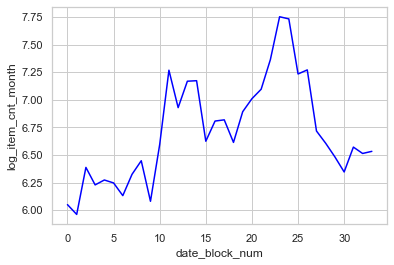


AUTOCORRELATION FOR LOG DATA: 


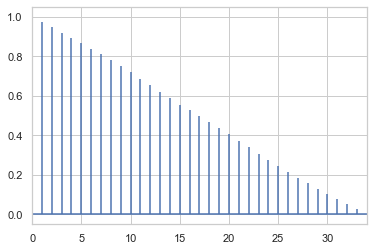

ITEM CATEGORY_ID:  36


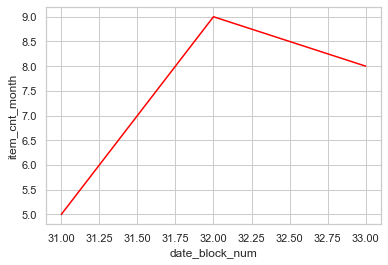

count   3.00
mean    7.33
std     2.08
min     5.00
25%     6.50
50%     8.00
75%     8.50
max     9.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

AUTOCORRELATION: 


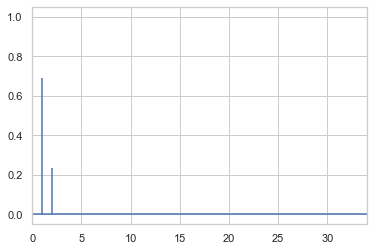


 LOG ITEM CNT MONTH:


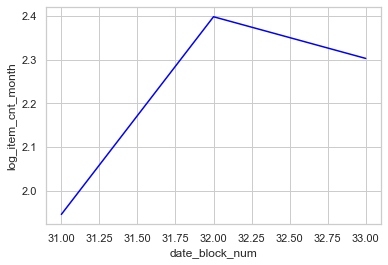


AUTOCORRELATION FOR LOG DATA: 


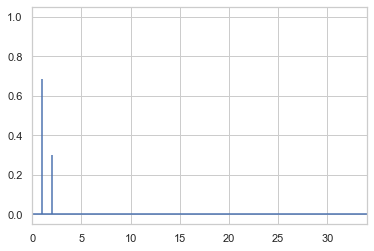

ITEM CATEGORY_ID:  37


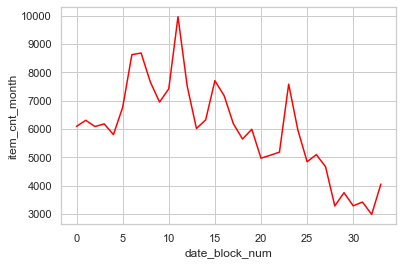

count      34.00
mean    5,978.94
std     1,662.16
min     2,989.00
25%     4,996.75
50%     6,053.50
75%     7,120.25
max     9,959.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


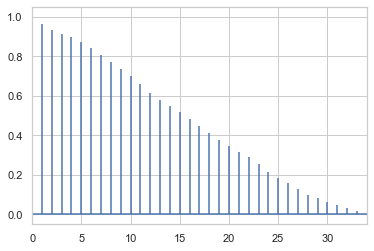


 LOG ITEM CNT MONTH:


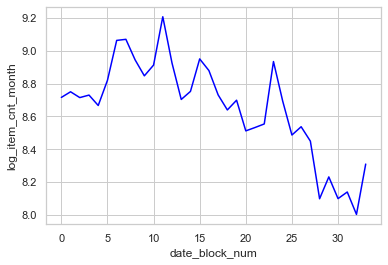


AUTOCORRELATION FOR LOG DATA: 


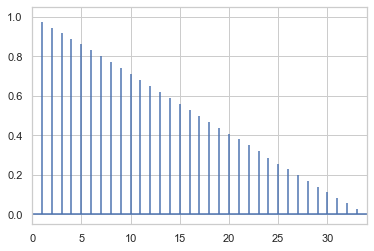

ITEM CATEGORY_ID:  38


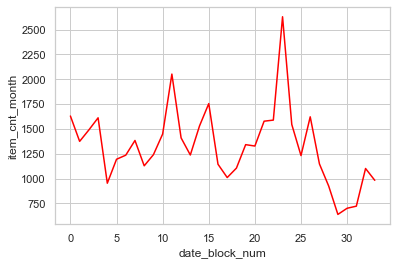

count      34.00
mean    1,324.47
std       386.84
min       640.00
25%     1,111.75
50%     1,284.50
75%     1,541.50
max     2,629.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


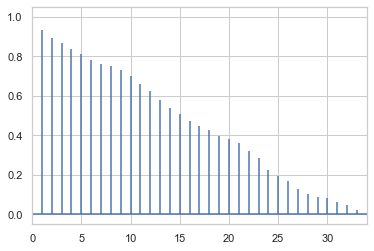


 LOG ITEM CNT MONTH:


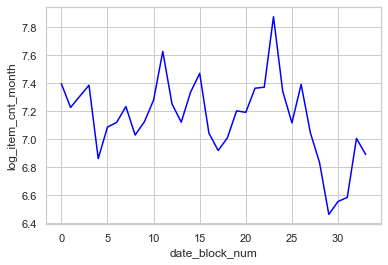


AUTOCORRELATION FOR LOG DATA: 


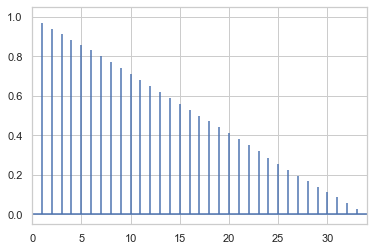

ITEM CATEGORY_ID:  39


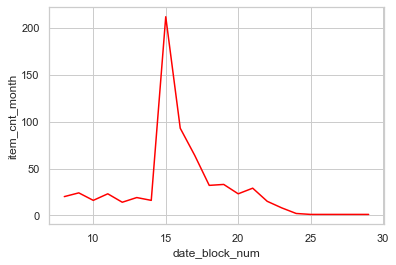

count    20.00
mean     32.30
std      47.67
min       1.00
25%      12.50
50%      19.50
75%      29.75
max     212.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 26, 28, 30, 31, 32, 33]

AUTOCORRELATION: 


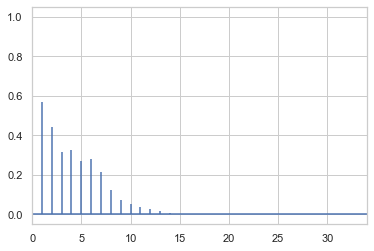


 LOG ITEM CNT MONTH:


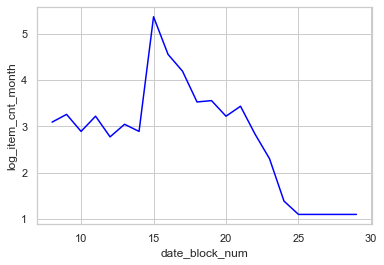


AUTOCORRELATION FOR LOG DATA: 


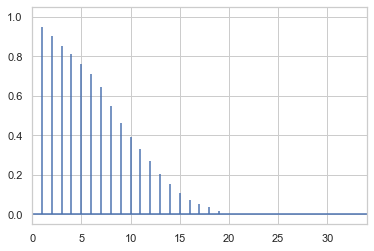

ITEM CATEGORY_ID:  40


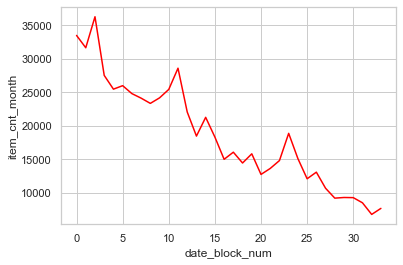

count       34.00
mean    18,652.09
std      7,904.05
min      6,779.00
25%     12,832.00
50%     17,192.00
75%     24,647.75
max     36,277.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


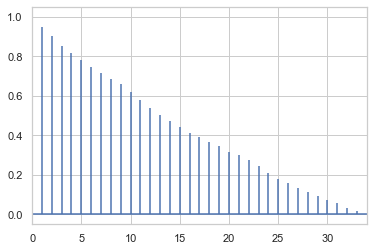


 LOG ITEM CNT MONTH:


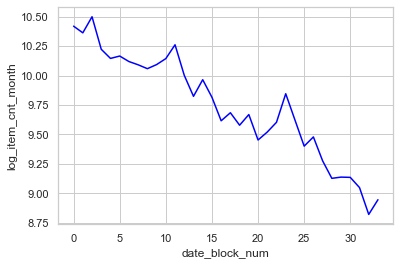


AUTOCORRELATION FOR LOG DATA: 


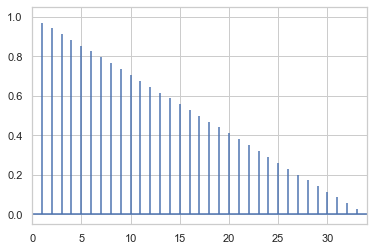

ITEM CATEGORY_ID:  41


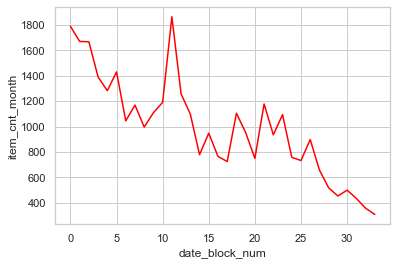

count      34.00
mean      994.41
std       403.86
min       309.00
25%       737.25
50%       974.50
75%     1,187.75
max     1,864.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


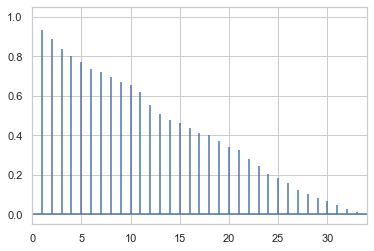


 LOG ITEM CNT MONTH:


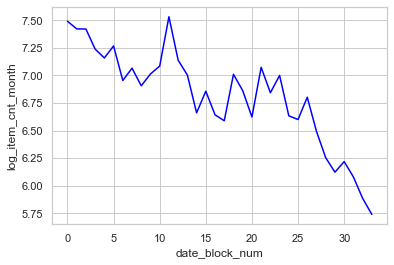


AUTOCORRELATION FOR LOG DATA: 


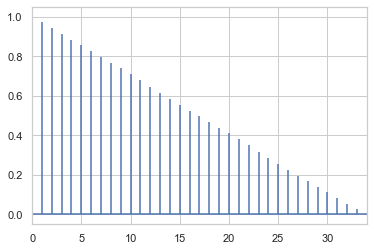

ITEM CATEGORY_ID:  42


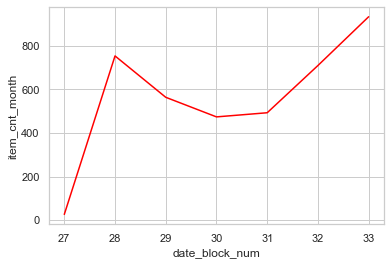

count     7.00
mean    565.00
std     287.78
min      26.00
25%     483.50
50%     564.00
75%     732.00
max     934.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

AUTOCORRELATION: 


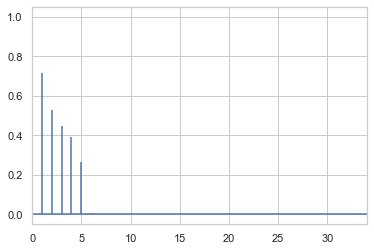


 LOG ITEM CNT MONTH:


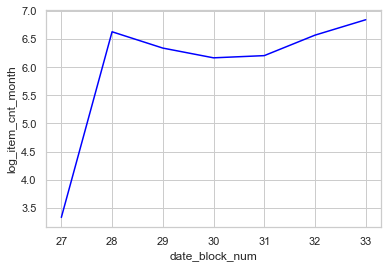


AUTOCORRELATION FOR LOG DATA: 


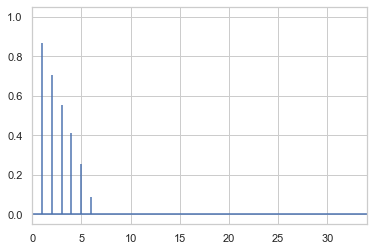

ITEM CATEGORY_ID:  43


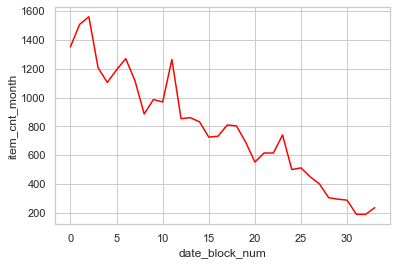

count      34.00
mean      782.21
std       383.18
min       188.00
25%       502.75
50%       771.50
75%     1,075.25
max     1,561.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


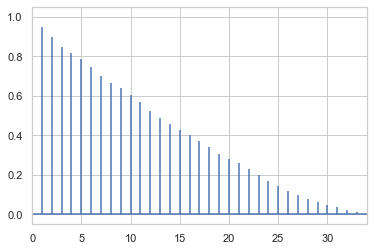


 LOG ITEM CNT MONTH:


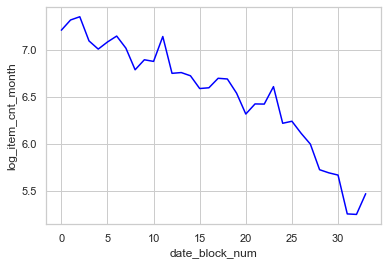


AUTOCORRELATION FOR LOG DATA: 


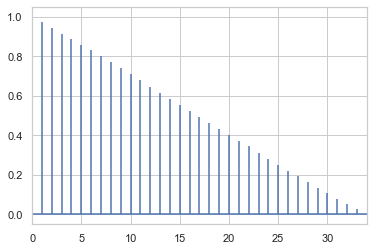

ITEM CATEGORY_ID:  44


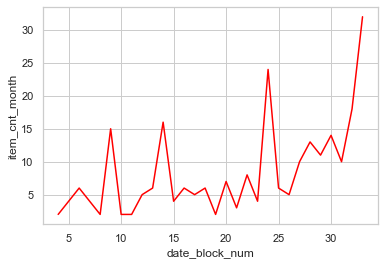

count   30.00
mean     8.40
std      7.03
min      2.00
25%      4.00
50%      6.00
75%     10.75
max     32.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3]

AUTOCORRELATION: 


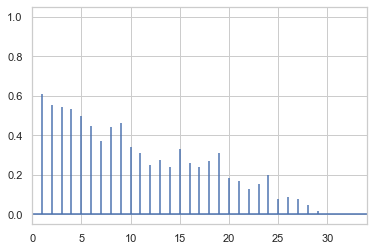


 LOG ITEM CNT MONTH:


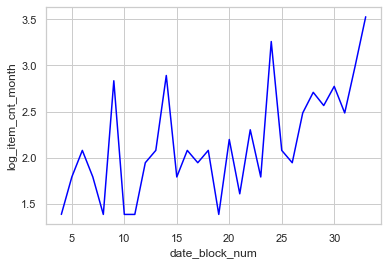


AUTOCORRELATION FOR LOG DATA: 


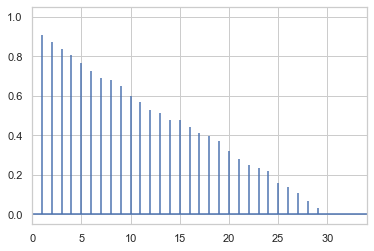

ITEM CATEGORY_ID:  45


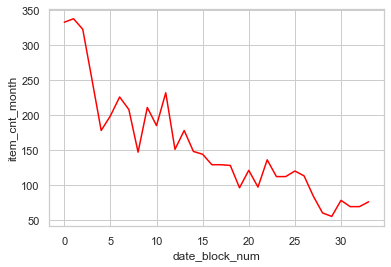

count    34.00
mean    154.00
std      76.24
min      55.00
25%     100.75
50%     132.50
75%     195.50
max     338.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


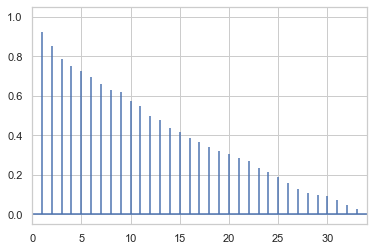


 LOG ITEM CNT MONTH:


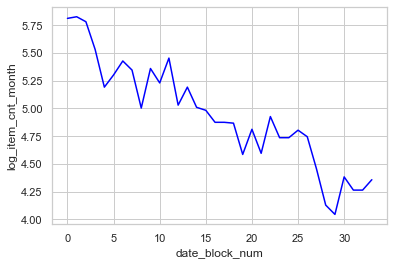


AUTOCORRELATION FOR LOG DATA: 


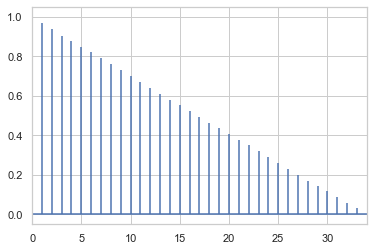

ITEM CATEGORY_ID:  46


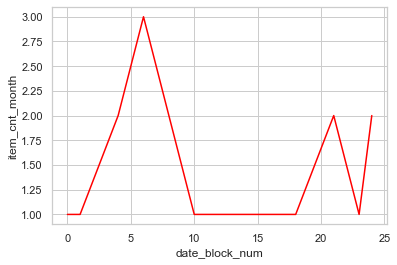

count   10.00
mean     1.50
std      0.71
min      1.00
25%      1.00
50%      1.00
75%      2.00
max      3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


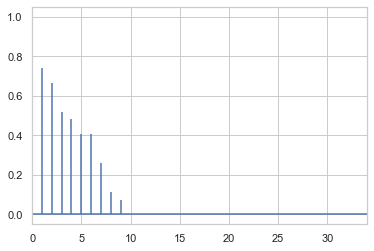


 LOG ITEM CNT MONTH:


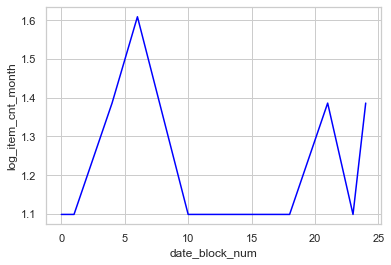


AUTOCORRELATION FOR LOG DATA: 


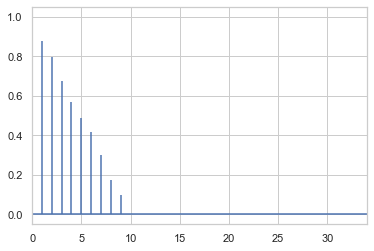

ITEM CATEGORY_ID:  47


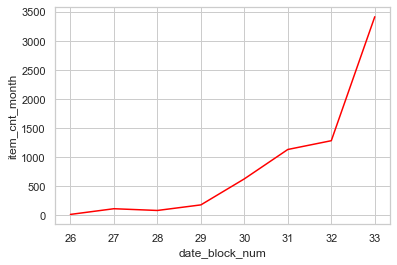

count       8.00
mean      859.50
std     1,145.89
min        18.00
25%       108.50
50%       406.00
75%     1,173.75
max     3,421.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

AUTOCORRELATION: 


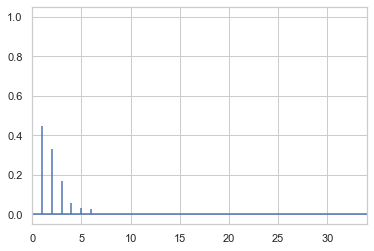


 LOG ITEM CNT MONTH:


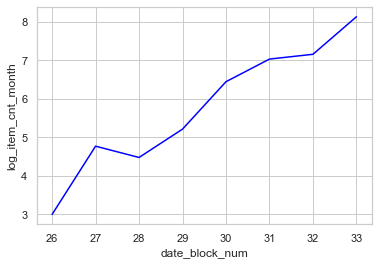


AUTOCORRELATION FOR LOG DATA: 


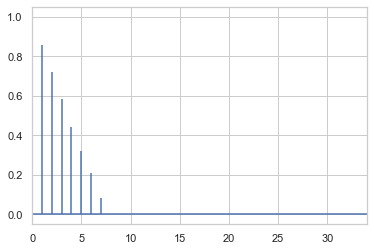

ITEM CATEGORY_ID:  48


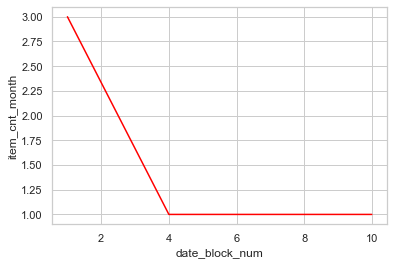

count   4.00
mean    1.50
std     1.00
min     1.00
25%     1.00
50%     1.00
75%     1.50
max     3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


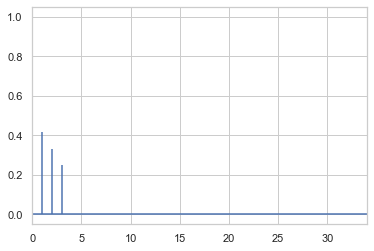


 LOG ITEM CNT MONTH:


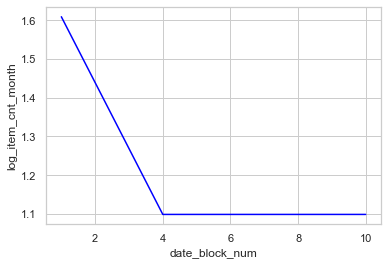


AUTOCORRELATION FOR LOG DATA: 


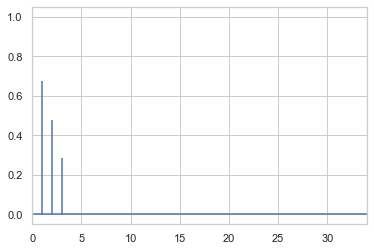

ITEM CATEGORY_ID:  49


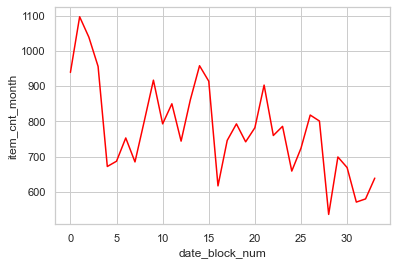

count      34.00
mean      779.12
std       132.82
min       536.00
25%       685.50
50%       771.00
75%       858.25
max     1,097.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


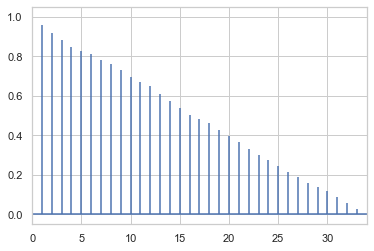


 LOG ITEM CNT MONTH:


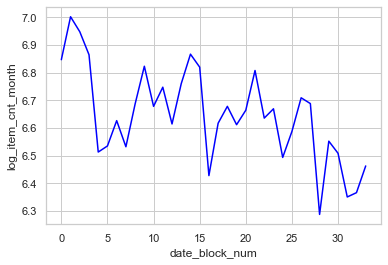


AUTOCORRELATION FOR LOG DATA: 


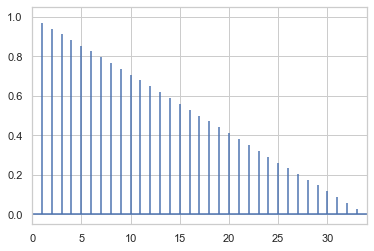

ITEM CATEGORY_ID:  50


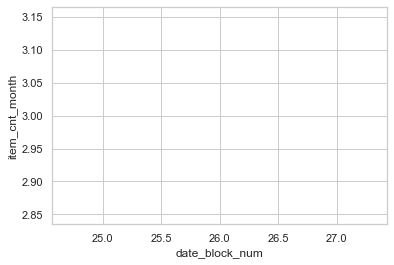

count   1.00
mean    3.00
std      nan
min     3.00
25%     3.00
50%     3.00
75%     3.00
max     3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


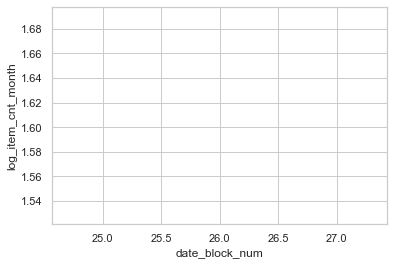


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  51


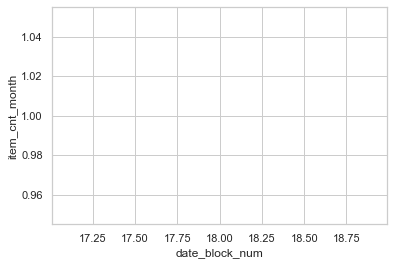

count   1.00
mean    1.00
std      nan
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


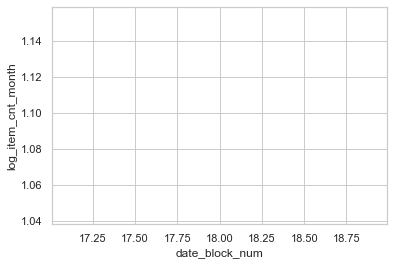


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  52


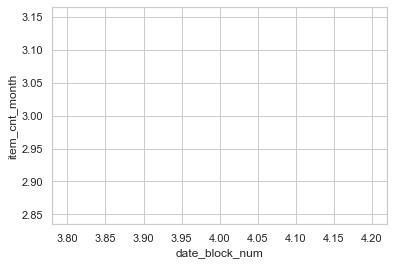

count   1.00
mean    3.00
std      nan
min     3.00
25%     3.00
50%     3.00
75%     3.00
max     3.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


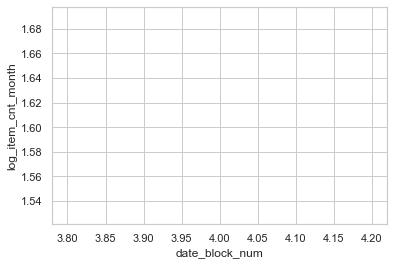


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  53


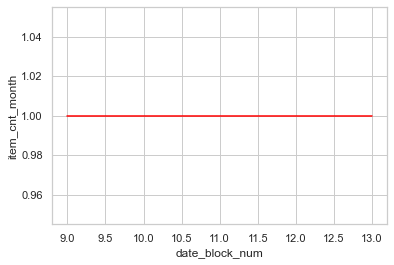

count   3.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


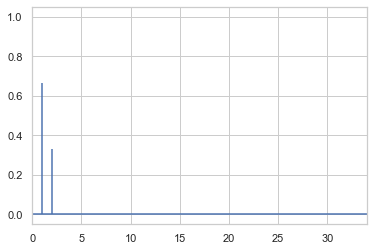


 LOG ITEM CNT MONTH:


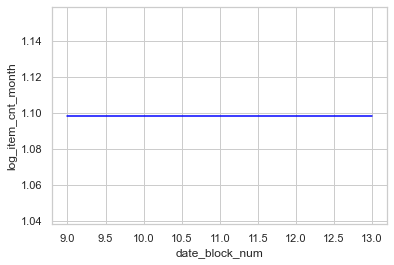


AUTOCORRELATION FOR LOG DATA: 


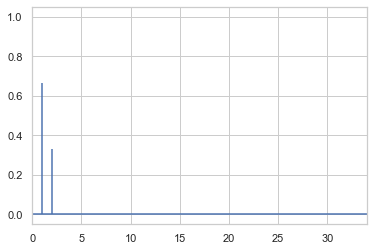

ITEM CATEGORY_ID:  54


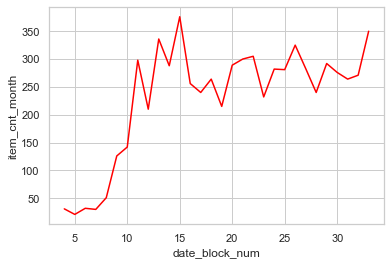

count    30.00
mean    230.20
std     103.50
min      21.00
25%     211.25
50%     267.50
75%     291.25
max     376.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3]

AUTOCORRELATION: 


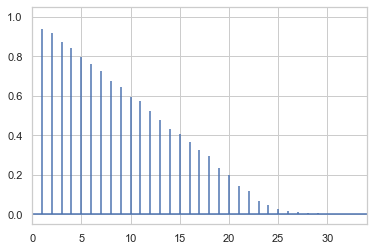


 LOG ITEM CNT MONTH:


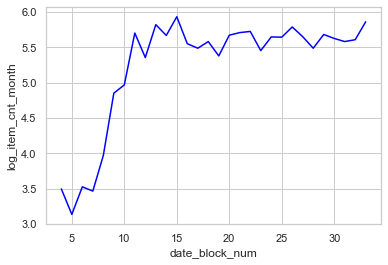


AUTOCORRELATION FOR LOG DATA: 


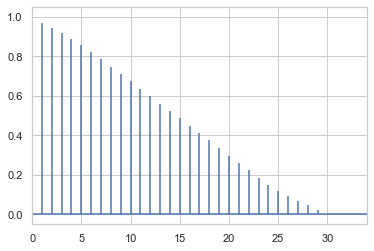

ITEM CATEGORY_ID:  55


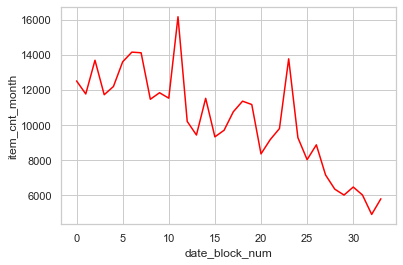

count       34.00
mean    10,252.68
std      2,818.47
min      4,913.00
25%      8,493.25
50%     10,492.50
75%     11,834.50
max     16,186.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


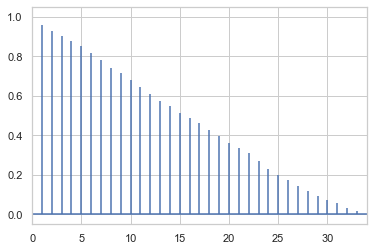


 LOG ITEM CNT MONTH:


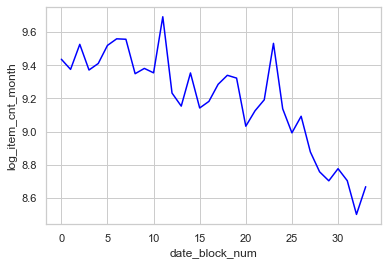


AUTOCORRELATION FOR LOG DATA: 


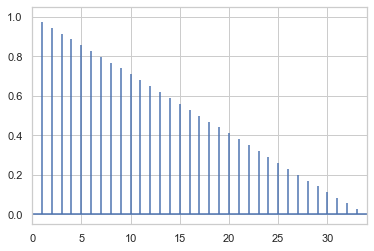

ITEM CATEGORY_ID:  56


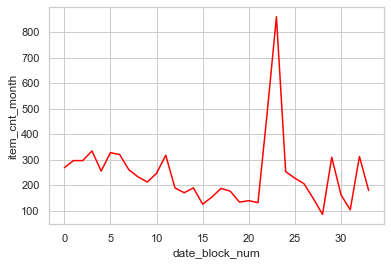

count    34.00
mean    243.56
std     137.61
min      85.00
25%     164.00
50%     219.50
75%     296.00
max     860.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


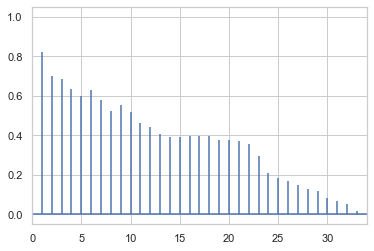


 LOG ITEM CNT MONTH:


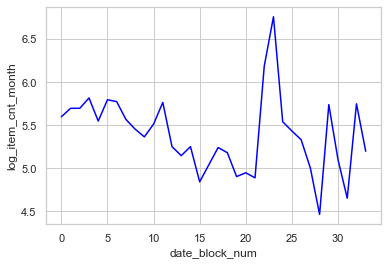


AUTOCORRELATION FOR LOG DATA: 


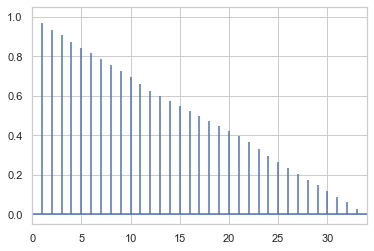

ITEM CATEGORY_ID:  57


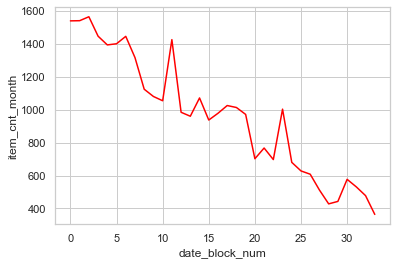

count      34.00
mean      961.26
std       367.61
min       364.00
25%       641.00
50%       981.00
75%     1,268.00
max     1,564.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


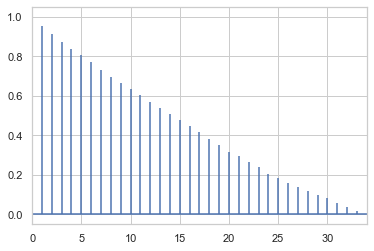


 LOG ITEM CNT MONTH:


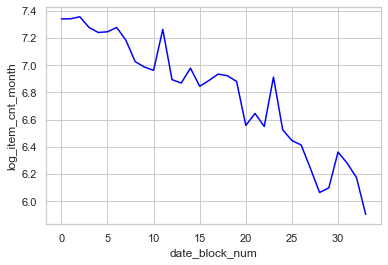


AUTOCORRELATION FOR LOG DATA: 


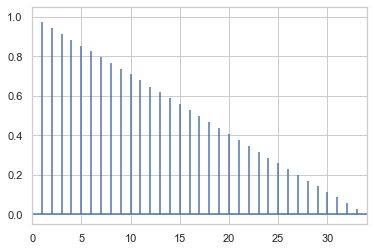

ITEM CATEGORY_ID:  58


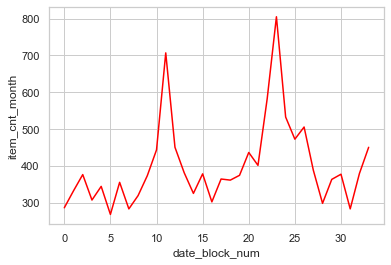

count    34.00
mean    400.91
std     116.55
min     269.00
25%     327.75
50%     376.00
75%     442.25
max     805.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


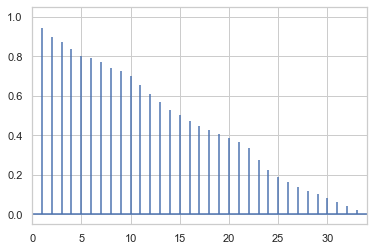


 LOG ITEM CNT MONTH:


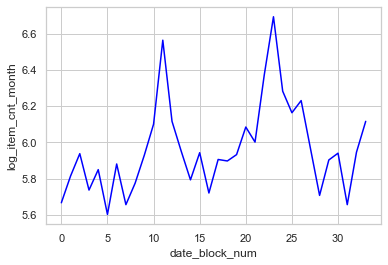


AUTOCORRELATION FOR LOG DATA: 


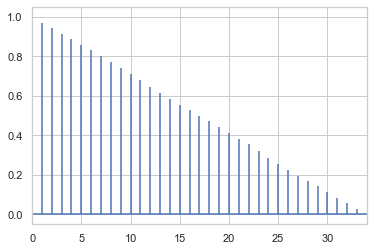

ITEM CATEGORY_ID:  59


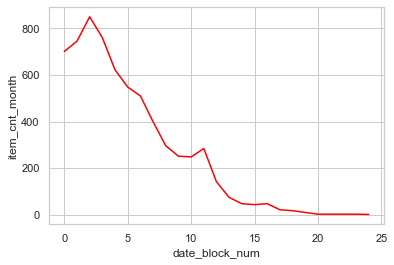

count    23.00
mean    287.43
std     292.16
min       1.00
25%      32.00
50%     248.00
75%     529.00
max     850.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [19, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


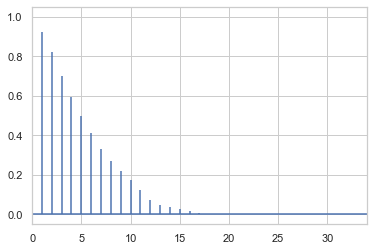


 LOG ITEM CNT MONTH:


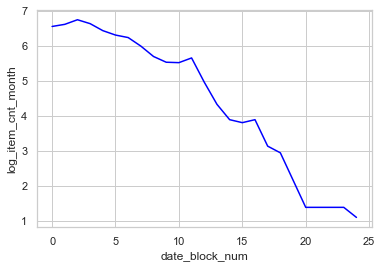


AUTOCORRELATION FOR LOG DATA: 


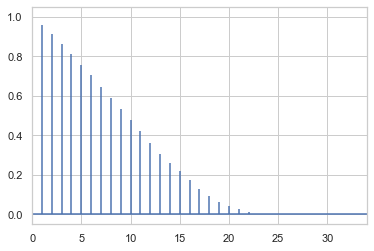

ITEM CATEGORY_ID:  60


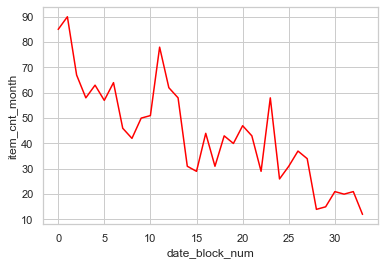

count   34.00
mean    44.03
std     20.06
min     12.00
25%     29.50
50%     43.00
75%     58.00
max     90.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


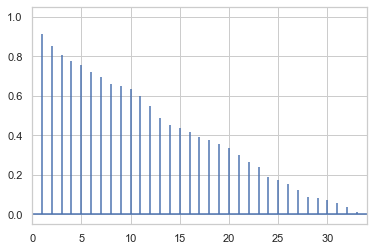


 LOG ITEM CNT MONTH:


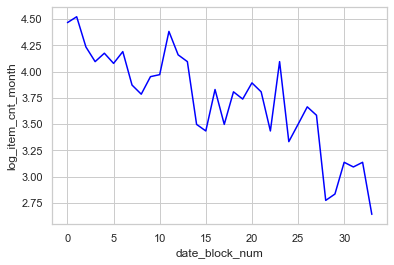


AUTOCORRELATION FOR LOG DATA: 


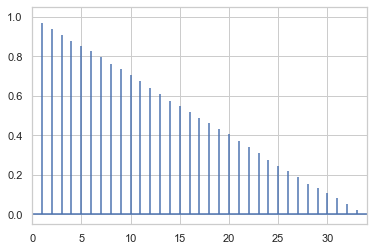

ITEM CATEGORY_ID:  61


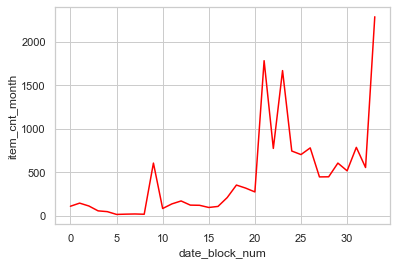

count      34.00
mean      447.35
std       536.09
min        14.00
25%       106.50
50%       240.50
75%       605.00
max     2,290.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


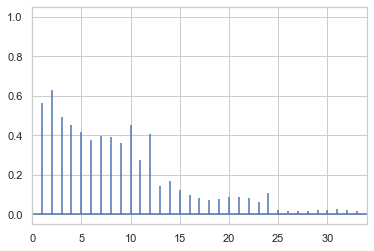


 LOG ITEM CNT MONTH:


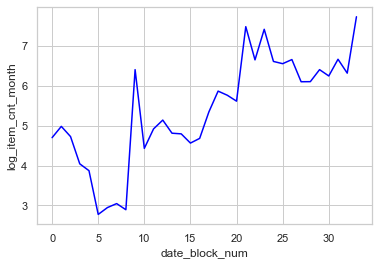


AUTOCORRELATION FOR LOG DATA: 


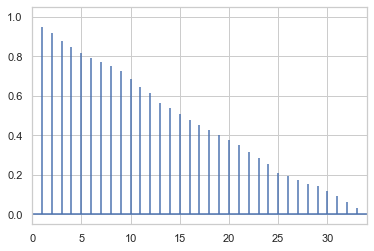

ITEM CATEGORY_ID:  62


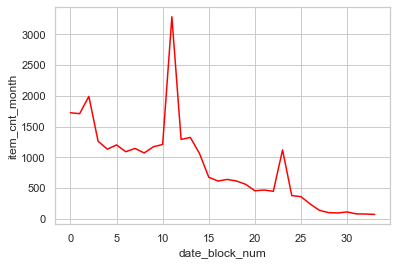

count      34.00
mean      851.26
std       687.23
min        73.00
25%       365.50
50%       659.00
75%     1,194.50
max     3,284.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


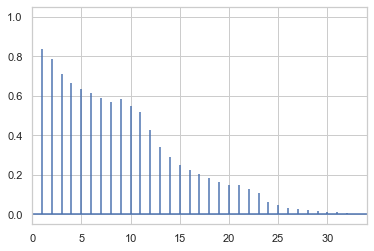


 LOG ITEM CNT MONTH:


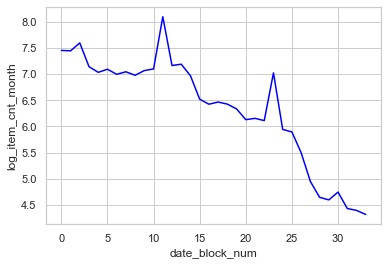


AUTOCORRELATION FOR LOG DATA: 


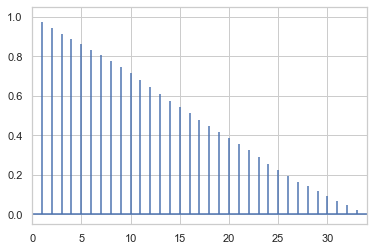

ITEM CATEGORY_ID:  63


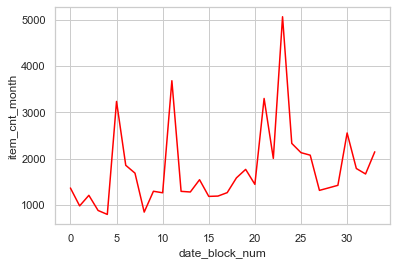

count      34.00
mean    1,789.88
std       897.74
min       797.00
25%     1,270.50
50%     1,496.00
75%     2,058.50
max     5,064.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


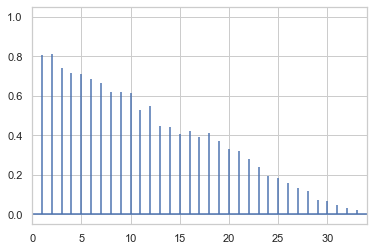


 LOG ITEM CNT MONTH:


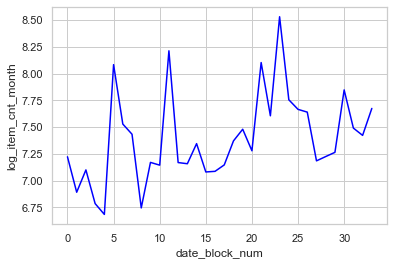


AUTOCORRELATION FOR LOG DATA: 


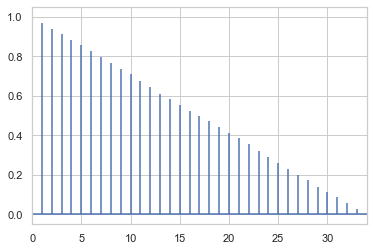

ITEM CATEGORY_ID:  64


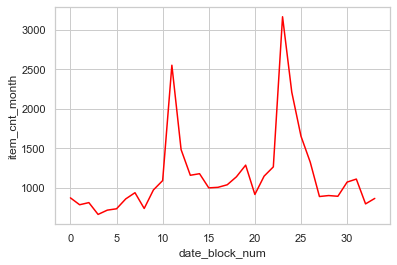

count      34.00
mean    1,157.56
std       530.81
min       668.00
25%       871.75
50%     1,006.50
75%     1,177.00
max     3,163.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


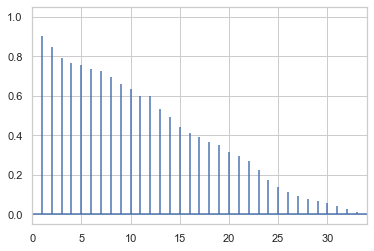


 LOG ITEM CNT MONTH:


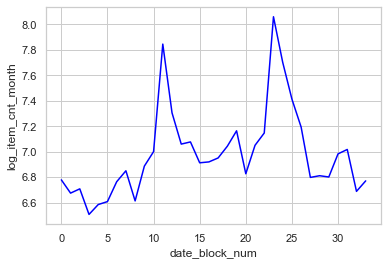


AUTOCORRELATION FOR LOG DATA: 


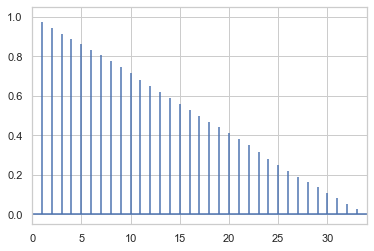

ITEM CATEGORY_ID:  65


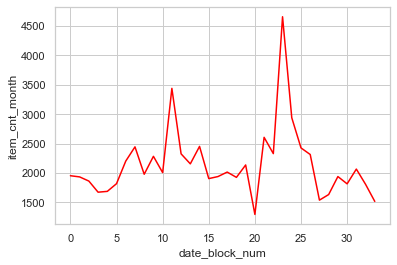

count      34.00
mean    2,149.32
std       606.59
min     1,297.00
25%     1,831.00
50%     1,994.00
75%     2,324.25
max     4,659.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


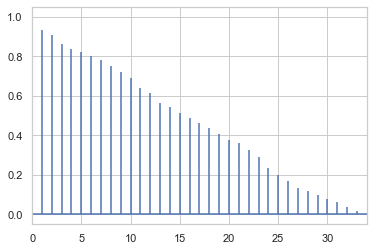


 LOG ITEM CNT MONTH:


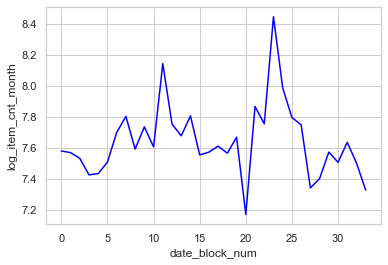


AUTOCORRELATION FOR LOG DATA: 


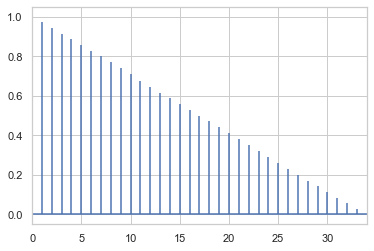

ITEM CATEGORY_ID:  66


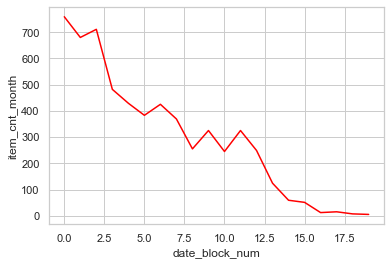

count    20.00
mean    295.50
std     240.35
min       5.00
25%      57.00
50%     290.00
75%     426.00
max     759.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


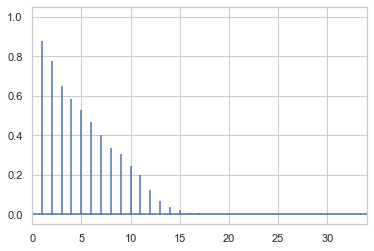


 LOG ITEM CNT MONTH:


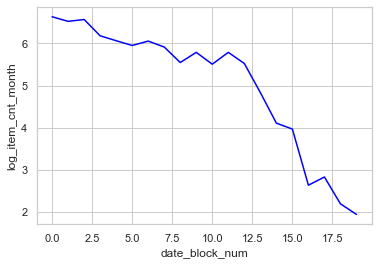


AUTOCORRELATION FOR LOG DATA: 


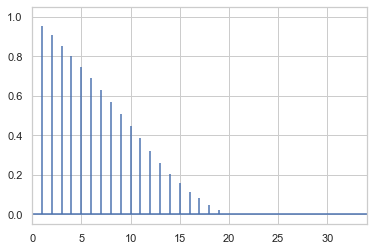

ITEM CATEGORY_ID:  67


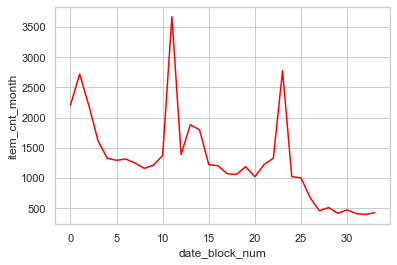

count      34.00
mean    1,303.03
std       740.92
min       398.00
25%     1,007.75
50%     1,218.00
75%     1,385.75
max     3,670.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


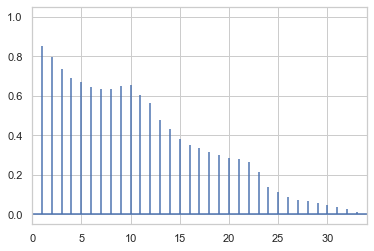


 LOG ITEM CNT MONTH:


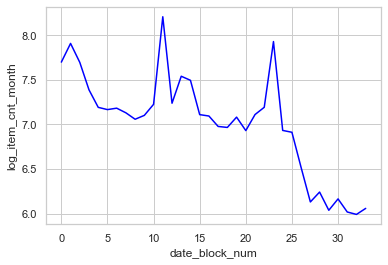


AUTOCORRELATION FOR LOG DATA: 


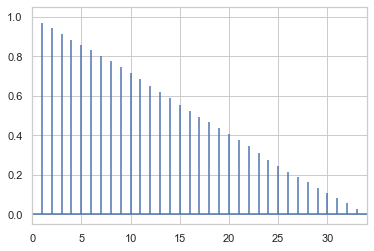

ITEM CATEGORY_ID:  68


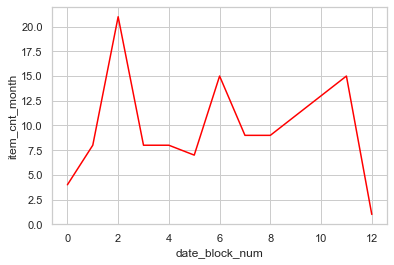

count   13.00
mean     9.92
std      5.17
min      1.00
25%      8.00
50%      9.00
75%     13.00
max     21.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


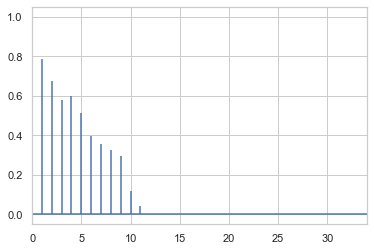


 LOG ITEM CNT MONTH:


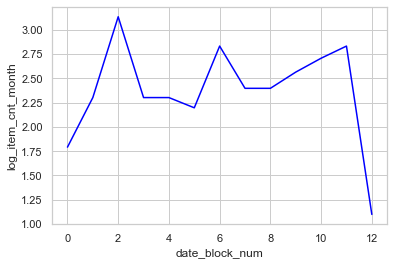


AUTOCORRELATION FOR LOG DATA: 


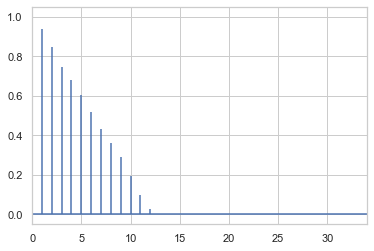

ITEM CATEGORY_ID:  69


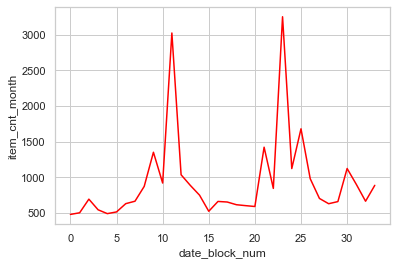

count      34.00
mean      938.09
std       626.08
min       480.00
25%       619.50
50%       699.00
75%       965.75
max     3,253.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


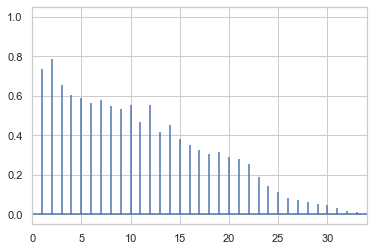


 LOG ITEM CNT MONTH:


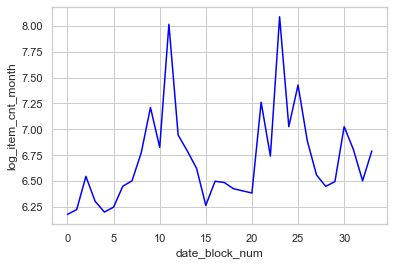


AUTOCORRELATION FOR LOG DATA: 


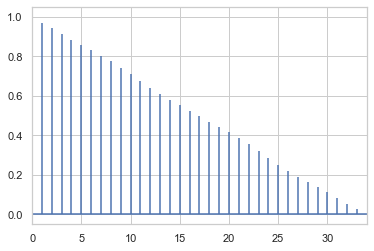

ITEM CATEGORY_ID:  70


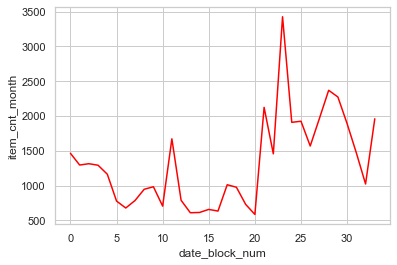

count      34.00
mean    1,325.50
std       656.24
min       587.00
25%       780.75
50%     1,228.50
75%     1,835.50
max     3,425.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


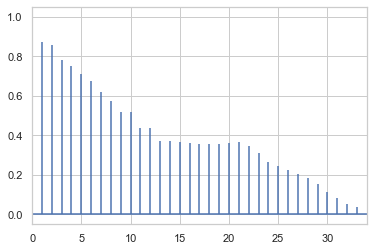


 LOG ITEM CNT MONTH:


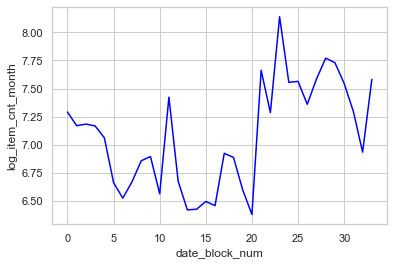


AUTOCORRELATION FOR LOG DATA: 


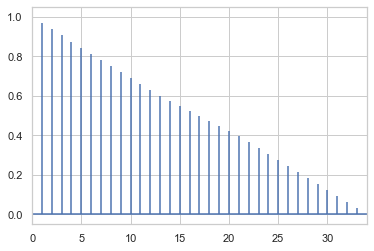

ITEM CATEGORY_ID:  71


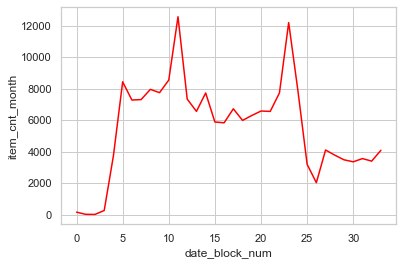

count       34.00
mean     5,529.35
std      3,090.93
min          6.00
25%      3,492.50
50%      6,131.00
75%      7,620.00
max     12,557.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


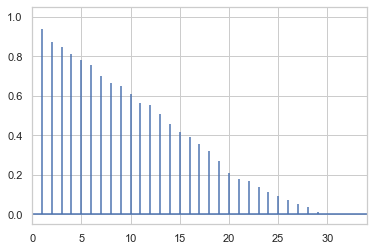


 LOG ITEM CNT MONTH:


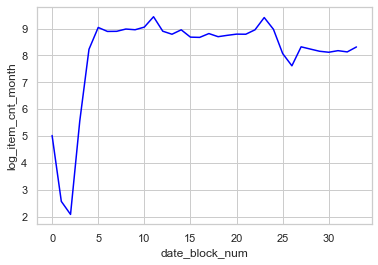


AUTOCORRELATION FOR LOG DATA: 


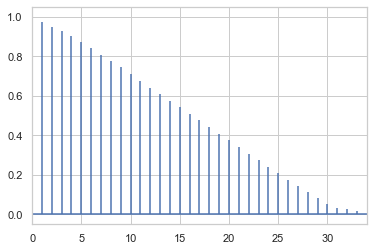

ITEM CATEGORY_ID:  72


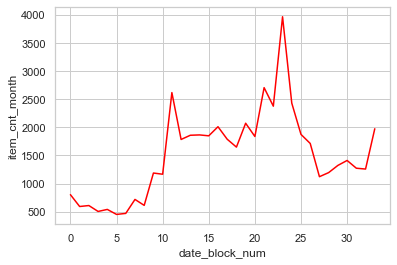

count      34.00
mean    1,518.26
std       784.93
min       450.00
25%       882.00
50%     1,530.00
75%     1,872.75
max     3,971.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


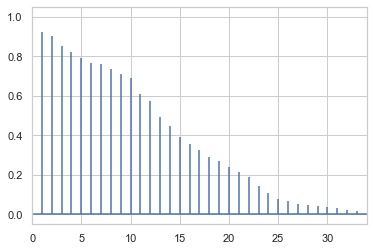


 LOG ITEM CNT MONTH:


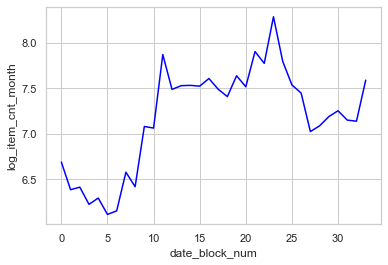


AUTOCORRELATION FOR LOG DATA: 


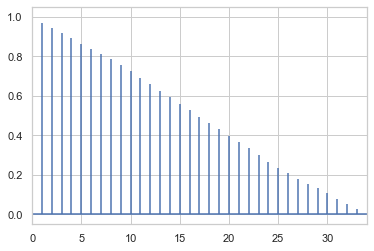

ITEM CATEGORY_ID:  73


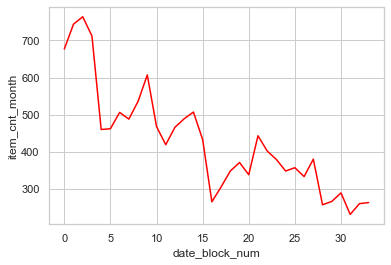

count    34.00
mean    428.62
std     143.41
min     231.00
25%     334.25
50%     410.50
75%     488.75
max     764.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


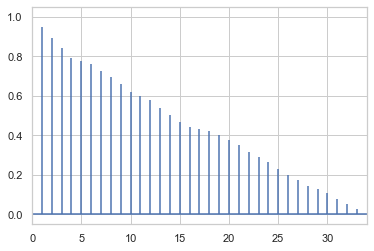


 LOG ITEM CNT MONTH:


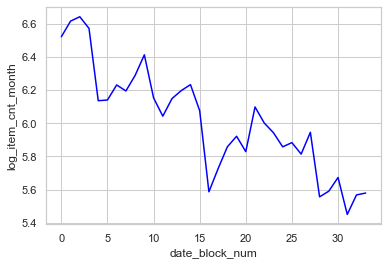


AUTOCORRELATION FOR LOG DATA: 


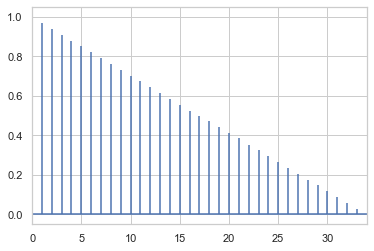

ITEM CATEGORY_ID:  74


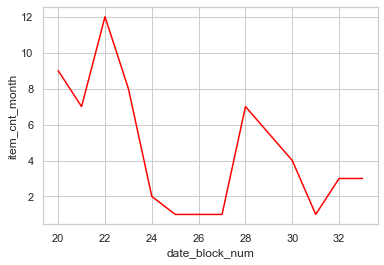

count   13.00
mean     4.54
std      3.67
min      1.00
25%      1.00
50%      3.00
75%      7.00
max     12.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29]

AUTOCORRELATION: 


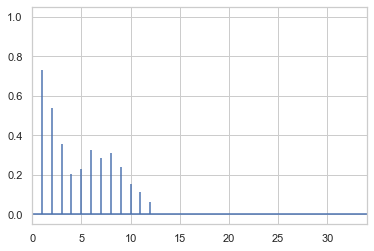


 LOG ITEM CNT MONTH:


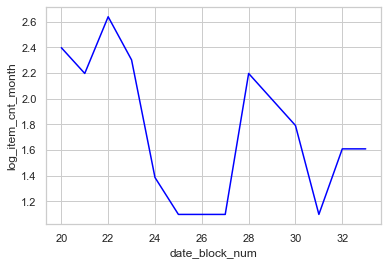


AUTOCORRELATION FOR LOG DATA: 


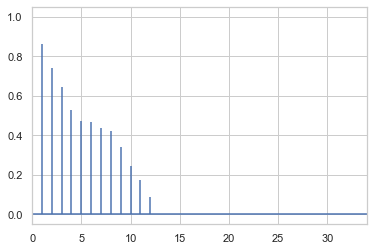

ITEM CATEGORY_ID:  75


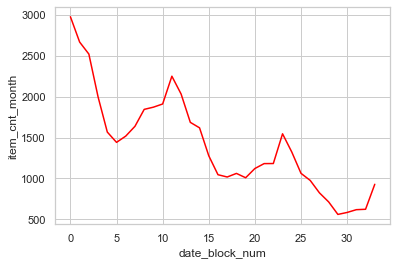

count      34.00
mean    1,418.35
std       613.47
min       560.00
25%     1,011.25
50%     1,301.00
75%     1,806.25
max     2,980.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


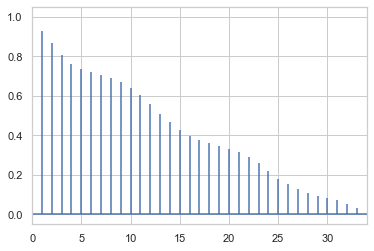


 LOG ITEM CNT MONTH:


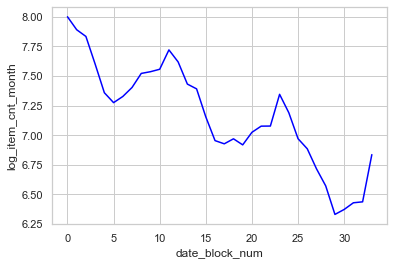


AUTOCORRELATION FOR LOG DATA: 


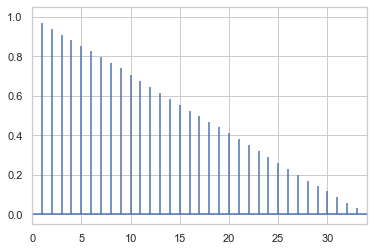

ITEM CATEGORY_ID:  76


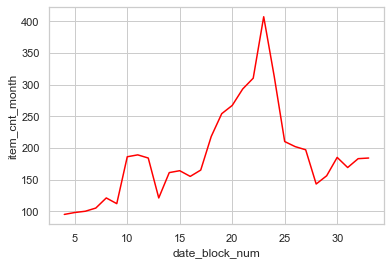

count    30.00
mean    188.23
std      72.94
min      95.00
25%     146.00
50%     183.50
75%     208.00
max     407.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3]

AUTOCORRELATION: 


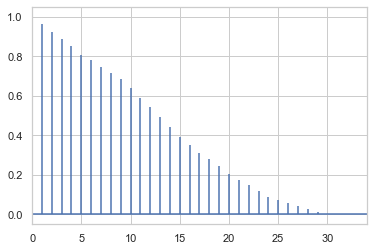


 LOG ITEM CNT MONTH:


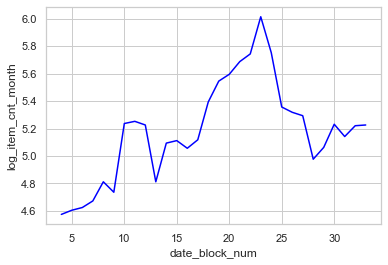


AUTOCORRELATION FOR LOG DATA: 


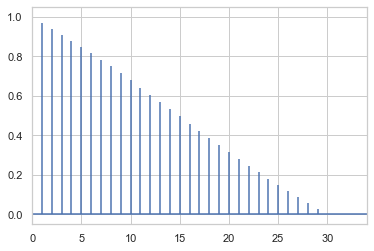

ITEM CATEGORY_ID:  77


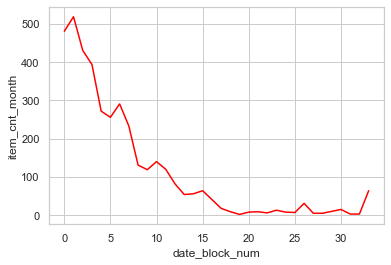

count    34.00
mean    114.71
std     152.06
min       2.00
25%       8.25
50%      47.50
75%     137.75
max     519.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


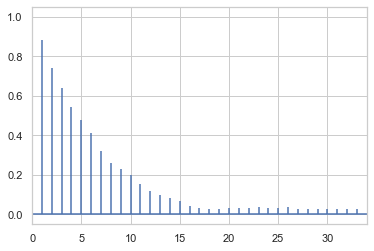


 LOG ITEM CNT MONTH:


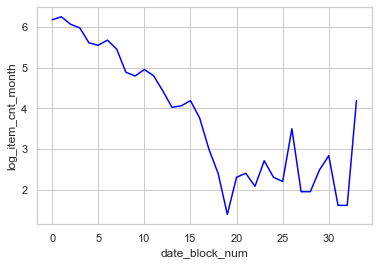


AUTOCORRELATION FOR LOG DATA: 


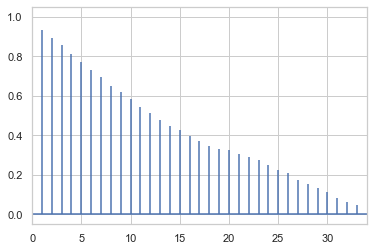

ITEM CATEGORY_ID:  78


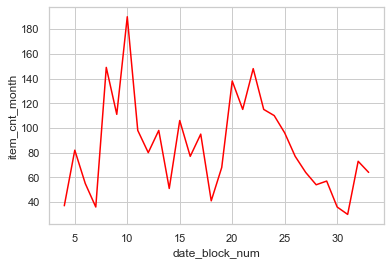

count    30.00
mean     85.03
std      38.66
min      30.00
25%      55.50
50%      78.50
75%     109.00
max     190.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3]

AUTOCORRELATION: 


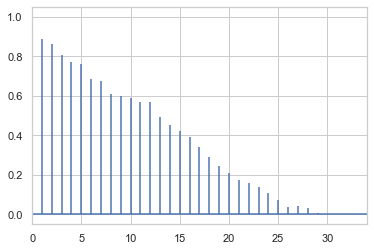


 LOG ITEM CNT MONTH:


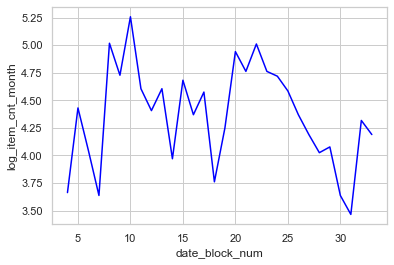


AUTOCORRELATION FOR LOG DATA: 


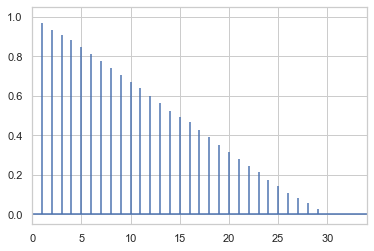

ITEM CATEGORY_ID:  79


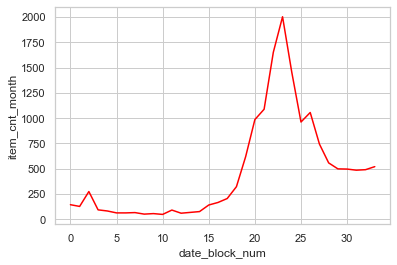

count      34.00
mean      465.59
std       508.58
min        49.00
25%        78.50
50%       240.50
75%       604.50
max     2,002.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


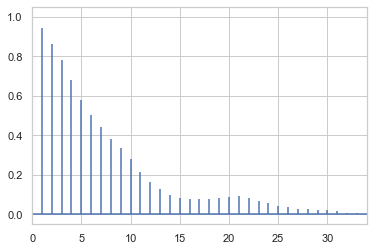


 LOG ITEM CNT MONTH:


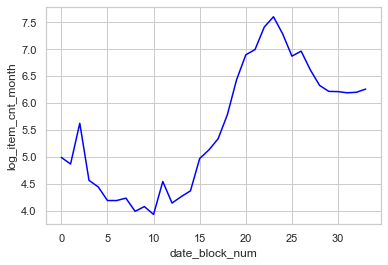


AUTOCORRELATION FOR LOG DATA: 


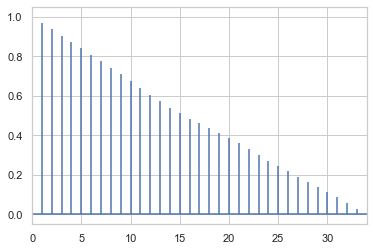

ITEM CATEGORY_ID:  80


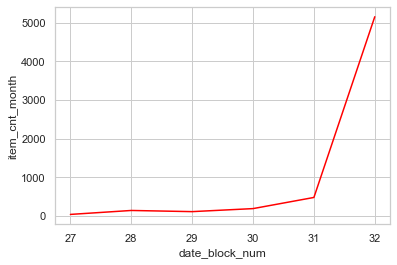

count       6.00
mean    1,022.67
std     2,027.10
min        45.00
25%       124.50
50%       171.00
75%       411.00
max     5,149.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 33]

AUTOCORRELATION: 


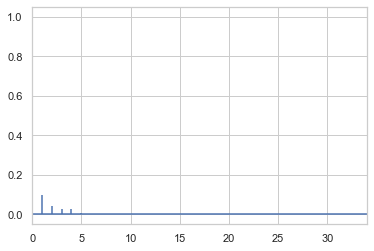


 LOG ITEM CNT MONTH:


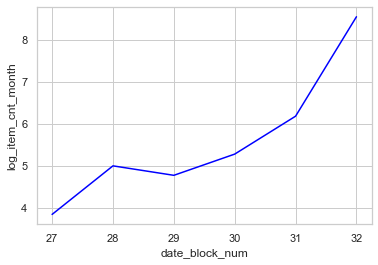


AUTOCORRELATION FOR LOG DATA: 


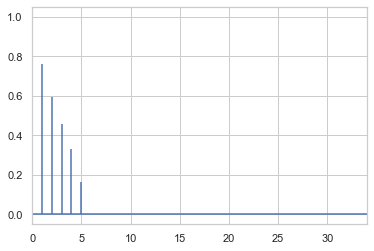

ITEM CATEGORY_ID:  81


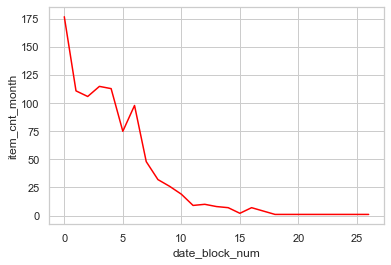

count    19.00
mean     50.79
std      53.65
min       1.00
25%       7.50
50%      26.00
75%     102.00
max     177.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


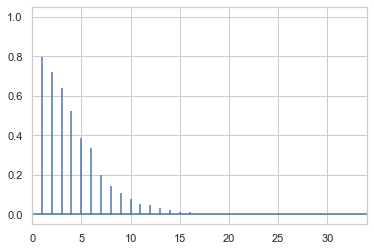


 LOG ITEM CNT MONTH:


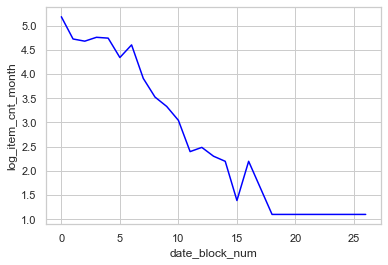


AUTOCORRELATION FOR LOG DATA: 


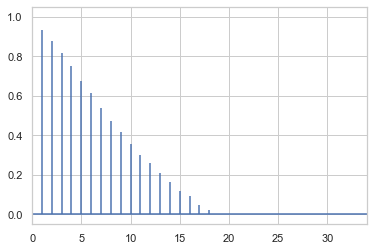

ITEM CATEGORY_ID:  82


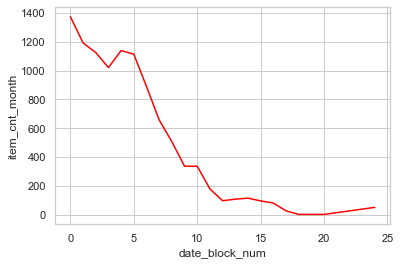

count      21.00
mean      497.00
std       487.63
min         1.00
25%        95.00
50%       336.00
75%     1,021.00
max     1,374.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES [19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


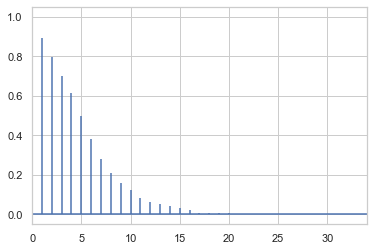


 LOG ITEM CNT MONTH:


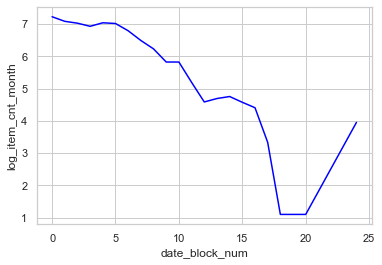


AUTOCORRELATION FOR LOG DATA: 


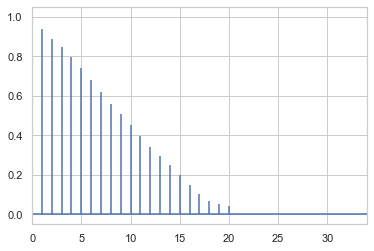

ITEM CATEGORY_ID:  83


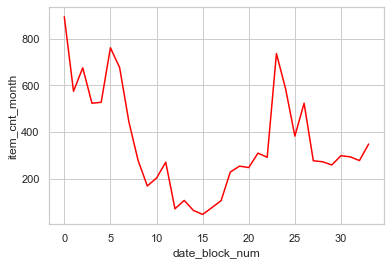

count    34.00
mean    353.88
std     221.40
min      46.00
25%     232.75
50%     284.50
75%     523.00
max     894.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES []

AUTOCORRELATION: 


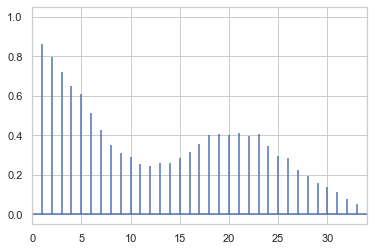


 LOG ITEM CNT MONTH:


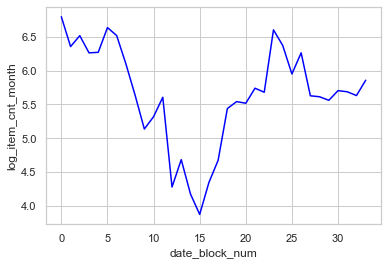


AUTOCORRELATION FOR LOG DATA: 


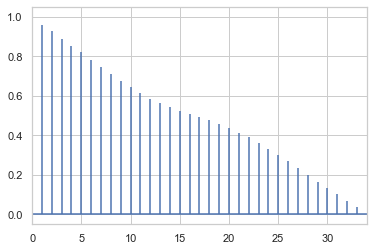

In [181]:
for item_category in item_categories:
    sns.set_style("whitegrid")

    print('='*100, '\nITEM CATEGORY_ID: ', item_category)
    
    sns.lineplot(x='date_block_num', y='item_cnt_month',
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category],
                 color="red");
    plt.show()

    print_info_for_item_category(df_grouped_item_category, item_category)
    
    print('\nAUTOCORRELATION: ')
    item_category_cnt_month_data = df_grouped_item_category.loc[df_grouped_item_category.item_category_id == item_category, 'item_cnt_month']
    if (item_category_cnt_month_data.size > 2): 
        plt.acorr(item_category_cnt_month_data, maxlags=None)
        plt.xlim([0, 34])
        plt.show()
        

    print('\n LOG ITEM CNT MONTH:')
    sns.lineplot(x='date_block_num', y='log_item_cnt_month', 
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category],
                    color='blue');
    plt.show()
    
    print('\nAUTOCORRELATION FOR LOG DATA: ')
    log_item_category_cnt_month_data = df_grouped_item_category.loc[df_grouped_item_category.item_category_id == item_category, 'log_item_cnt_month']
    if (item_category_cnt_month_data.size > 2):
        plt.acorr(log_item_category_cnt_month_data, maxlags=None)
        plt.xlim([0, 34])
        plt.show()
    
    
    

In [ ]:
date_blocks = set(df.date_block_num)
len(date_blocks)